# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pwd


/N/u/aarudua/BigRed200


In [3]:
!pwd

/N/u/aarudua/BigRed200


In [4]:
!ls -l kaggle.json

-rw-r--r-- 1 aarudua aarudua 66 Apr 11 13:56 kaggle.json


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/N/u/aarudua/BigRed200/.kaggle’: File exists


In [6]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




![dataset](https://user-images.githubusercontent.com/77334892/230755289-f8a02cfc-5ec6-4e98-85fd-6c28698ed577.jpeg)


## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [7]:
DATA_DIR = "../data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir ../data ../data/home-credit-default-risk

mkdir: cannot create directory ‘../data’: File exists
mkdir: cannot create directory ‘../data/home-credit-default-risk’: File exists


In [8]:
!ls -l {DATA_DIR}

total 3326848
-rw-r--r-- 1 aarudua aarudua  26567651 Apr 11 14:01 application_test.csv
-rw-r--r-- 1 aarudua aarudua 166133370 Apr 11 14:01 application_train.csv
-rw-r--r-- 1 aarudua aarudua 375592889 Apr 11 14:01 bureau_balance.csv
-rw-r--r-- 1 aarudua aarudua 170016717 Apr 11 14:01 bureau.csv
-rw-r--r-- 1 aarudua aarudua 424582605 Apr 11 14:01 credit_card_balance.csv
-rw-r--r-- 1 aarudua aarudua     37383 Apr 11 14:01 HomeCredit_columns_description.csv
-rw-r--r-- 1 aarudua aarudua 721616255 Apr 11 13:57 home-credit-default-risk.zip
-rw-r--r-- 1 aarudua aarudua 723118349 Apr 11 14:01 installments_payments.csv
-rw-r--r-- 1 aarudua aarudua 392703158 Apr 11 14:01 POS_CASH_balance.csv
-rw-r--r-- 1 aarudua aarudua 404973293 Apr 11 14:01 previous_application.csv
-rw-r--r-- 1 aarudua aarudua    536202 Apr 11 14:01 sample_submission.csv


In [9]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!pwd 

/N/u/aarudua/BigRed200


In [11]:
!ls -l $DATA_DIR

total 3326848
-rw-r--r-- 1 aarudua aarudua  26567651 Apr 11 14:01 application_test.csv
-rw-r--r-- 1 aarudua aarudua 166133370 Apr 11 14:01 application_train.csv
-rw-r--r-- 1 aarudua aarudua 375592889 Apr 11 14:01 bureau_balance.csv
-rw-r--r-- 1 aarudua aarudua 170016717 Apr 11 14:01 bureau.csv
-rw-r--r-- 1 aarudua aarudua 424582605 Apr 11 14:01 credit_card_balance.csv
-rw-r--r-- 1 aarudua aarudua     37383 Apr 11 14:01 HomeCredit_columns_description.csv
-rw-r--r-- 1 aarudua aarudua 721616255 Apr 11 13:57 home-credit-default-risk.zip
-rw-r--r-- 1 aarudua aarudua 723118349 Apr 11 14:01 installments_payments.csv
-rw-r--r-- 1 aarudua aarudua 392703158 Apr 11 14:01 POS_CASH_balance.csv
-rw-r--r-- 1 aarudua aarudua 404973293 Apr 11 14:01 previous_application.csv
-rw-r--r-- 1 aarudua aarudua    536202 Apr 11 14:01 sample_submission.csv


In [12]:
#!rm -r  DATA_DIR

### Imports

In [13]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [18]:
unzippingReq = True #True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall('../data/home-credit-default-risk') 
    zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](https://user-images.githubusercontent.com/77334892/231280231-268b2121-aa99-409b-892b-da26b7fdd656.png)

### Application train

In [19]:
ls -l ../data/home-credit-default-risk/application_train.csv/

ls: cannot access '../data/home-credit-default-risk/application_train.csv/': Not a directory


In [20]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR=f"../data/home-credit-default-risk/"
pd.set_option('display.max_columns', None)
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

(307511, 122)

**The training data has 307511 observations with each row representing one loan detail including Target feature (0: Loan repaid and 1: Loan not repaid) along with other 121 features.**

In [21]:
#COLUMNS PRESENT IN THE DATA
print(datasets['application_train'].columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [22]:
DATA_DIR

'../data/home-credit-default-risk/'

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [23]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [24]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 22.7 s, sys: 1.78 s, total: 24.5 s
Wall time: 24.5 s


In [25]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

**This  process will summarize the data using statistical and visualization approaches with the objective to focus on key features of the data so that data can be cleaned for training**

## Summary of Application train

In [26]:
# COLUMNS INFO
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### **Observation:**

- There are 65 columns with float datatype, 41 columns with int and 16 columns with categorical value.

In [27]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [28]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

In [29]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Missing data for application train

In [30]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199


In [31]:
missinga5 = missing_application_train_data.loc[missing_application_train_data['Percent'] > 55]
missinga5

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199


In all of the above columns with more than 55% data missing the below three are the least correlated with the TARGET value. Hence we are dropping them from the table entirely.

In [32]:
drop = datasets["application_train"]['NONLIVINGAPARTMENTS_MODE'].corr(datasets["application_train"]['TARGET'])
drop

-0.0015565608459037733

In [33]:
drop = datasets["application_train"]['NONLIVINGAPARTMENTS_AVG'].corr(datasets["application_train"]['TARGET'])
drop

-0.003176107520726144

In [34]:
drop = datasets["application_train"]['NONLIVINGAPARTMENTS_MEDI'].corr(datasets["application_train"]['TARGET'])
drop

-0.002757148602108341

Number of columns with missing value greater than 0: 67
Number of columns with more than 60% missing values: 17


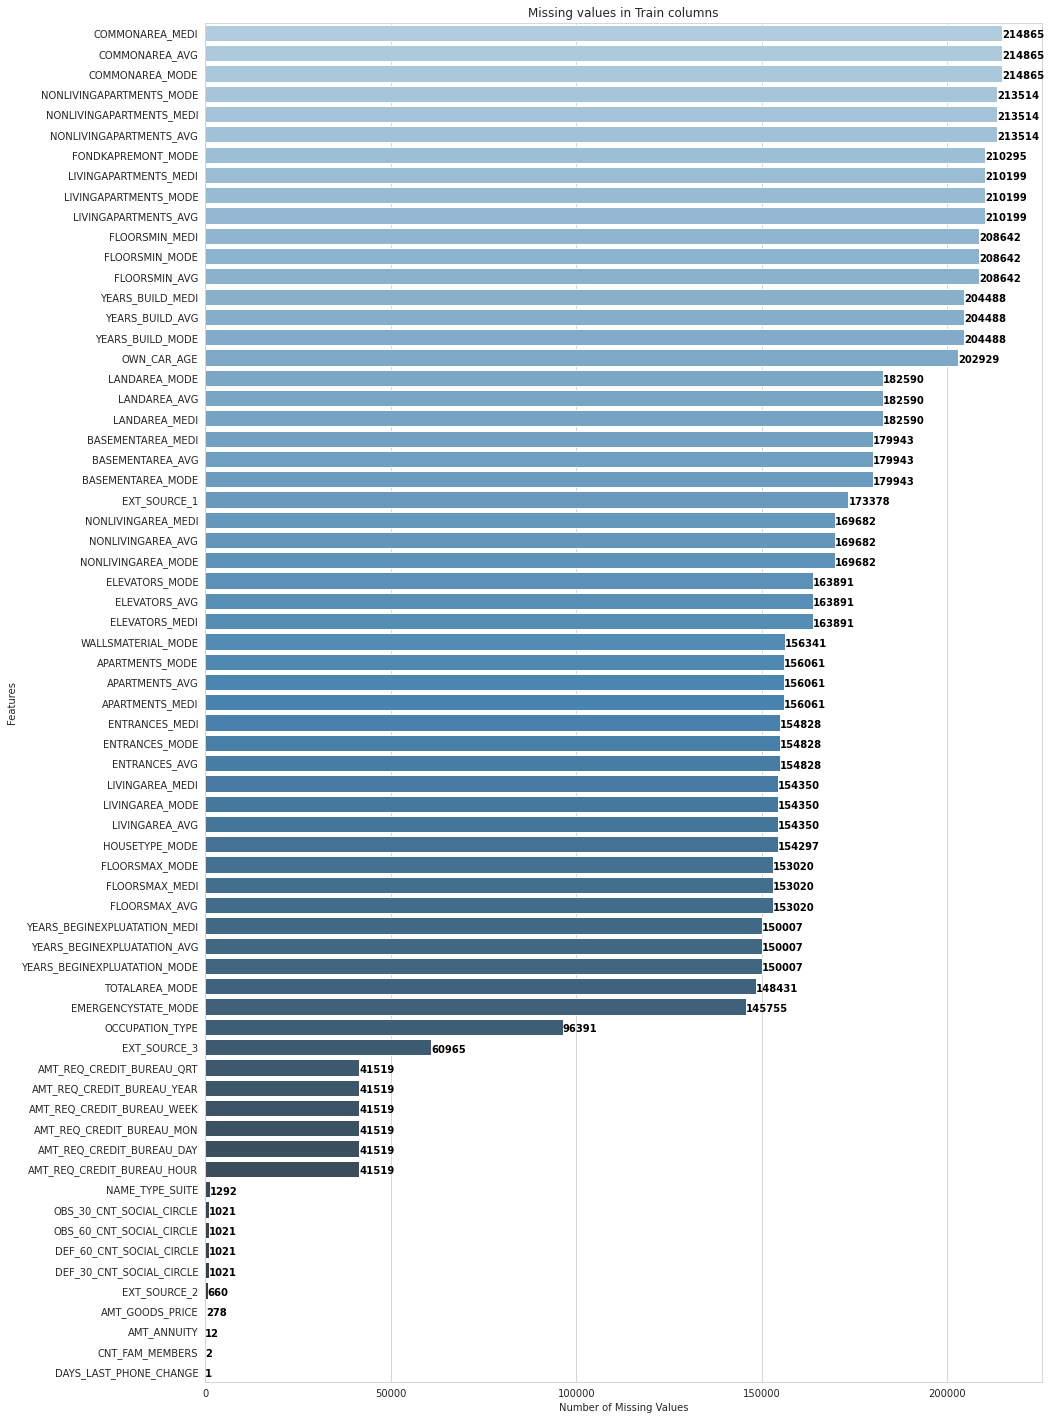

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows with count of missing values greater than 0
missing_application_train_data = missing_application_train_data[missing_application_train_data['Train Missing Count'] > 0]
print("Number of columns with missing value greater than 0:",len(missing_application_train_data))
missing_more_than_60=missing_application_train_data[missing_application_train_data['Percent'] >=60]
print("Number of columns with more than 60% missing values:", len(missing_more_than_60))

plt.figure(figsize=(15, 25))

sns.set_style("whitegrid")
ax = sns.barplot(x="Train Missing Count", y=missing_application_train_data.index, data=missing_application_train_data,
                 palette="Blues_d")

# Set the figure size and axis labels

ax.set_xlabel("Number of Missing Values")
ax.set_ylabel("Features")

plt.title('Missing values in Train columns')

# Add values to the bars
for i, v in enumerate(missing_application_train_data['Train Missing Count']):
    ax.text(v + 10, i + .25, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

In [36]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)

,Percent,Test Missing Count
COMMONAREA_MEDI,68.72,33495
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
NONLIVINGAPARTMENTS_AVG,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780


Number of columns with missing value greater than 0: 64
Number of columns with more than 60% missing values: 17


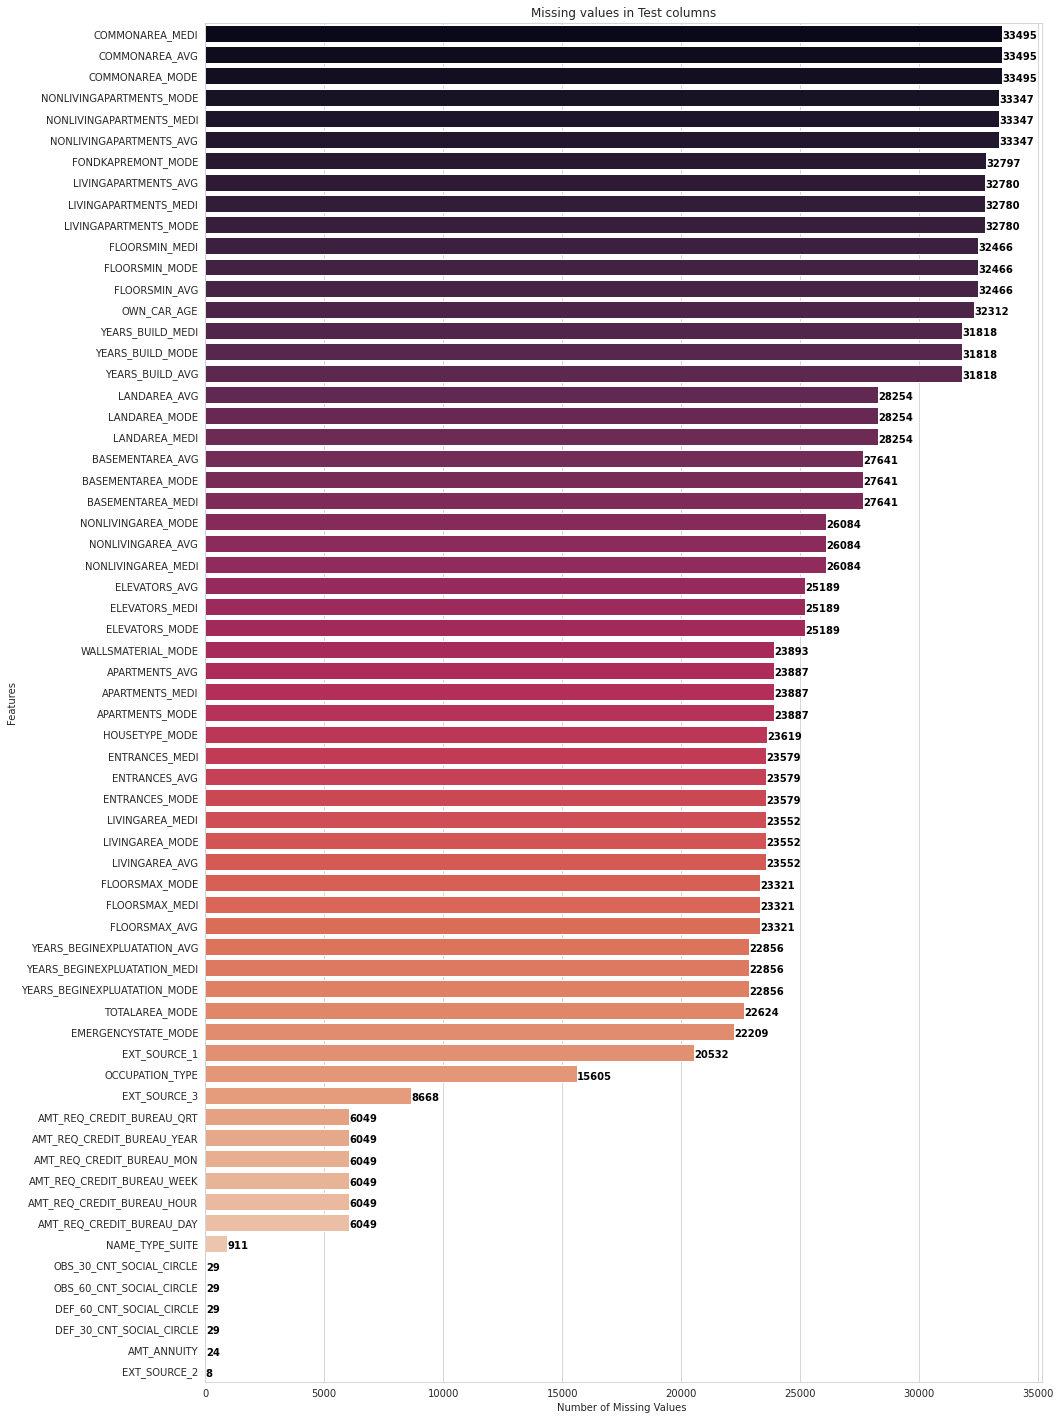

In [37]:


# Filter rows with count of missing values greater than 0
missing_application_test_data = missing_application_test_data[missing_application_test_data['Test Missing Count'] > 0]
print("Number of columns with missing value greater than 0:",len(missing_application_test_data))
missing_more_than_60=missing_application_test_data[missing_application_test_data['Percent'] >=60]
print("Number of columns with more than 60% missing values:", len(missing_more_than_60))

plt.figure(figsize=(15, 25))

sns.set_style("whitegrid")
ax = sns.barplot(x="Test Missing Count", y=missing_application_test_data.index, data=missing_application_test_data,
                 palette="rocket")

# Set the figure size and axis labels

ax.set_xlabel("Number of Missing Values ")
ax.set_ylabel("Features")

plt.title('Missing values in Test columns')

# Add values to the bars
for i, v in enumerate(missing_application_test_data['Test Missing Count']):
    ax.text(v + 10, i + .25, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

### **Observation**

- 17 columns have more than 60% of the data missing in both train and test file.
- 67 columns in application train have missing vales whereas 64 columns in application test have missing values
- It's better to check the correlation of these columns with the target variable and drop the columns with very low correlation with the target variable instead of filling the missing values in these columns using an imputer as the mean of the column will be ambiguous due to a lot of null values but we can experiment with all the columns right now and later we can remove them if the accuracy is coming low.



In [38]:
datasets["application_train"] = datasets["application_train"].drop(['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'], axis=1)
datasets["application_train"].shape


(307511, 119)

In [39]:
datasets["application_test"] = datasets["application_test"].drop(['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'], axis=1)
datasets["application_test"].shape

(48744, 118)

### **Observation**
As we can see above in the shape that both in the train and test datasets we have dropped the three columns that had a very low correlation to the target of the dataset.

### Distribution of the target column 

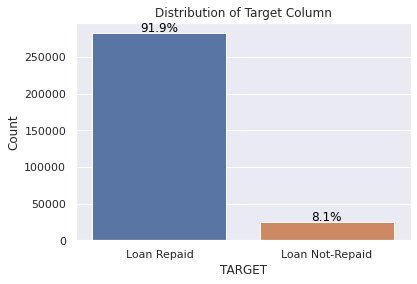

In [40]:
# Create a bar plot of the distribution of the target column
sns.set(style='darkgrid')
ax = sns.countplot(x='TARGET', data=datasets['application_train'])

# Set the plot title and axis labels
plt.title('Distribution of Target Column')
plt.xlabel('TARGET')
plt.ylabel('Count')

# Set the tick labels for the x-axis
plt.xticks([0, 1], ['Loan Repaid', 'Loan Not-Repaid'])

# Add percentage values on top of the bars
total = float(len(datasets['application_train']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

### **Observation**
- There's huge a class imbalance between target 0 and 1, we need to resolve this issue later before passing the input data to the model
- 91.9% of the loans get repaid whereas 8.1% of loans is still not repaid

### Correlation with  the target column 

In [41]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


<AxesSubplot:>

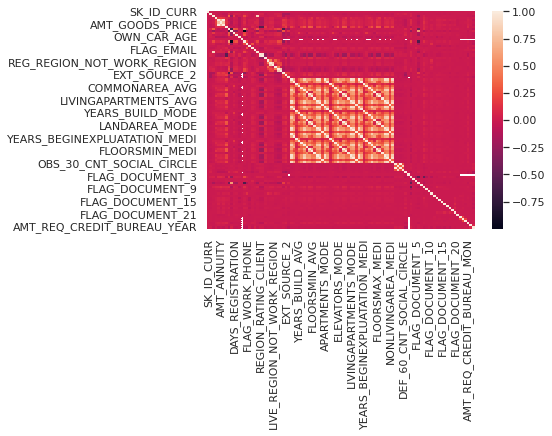

In [42]:
correlations = datasets["application_train"].corr()
sns.set_theme(style="white")
sns.heatmap(correlations)

### **Observation**
- Check which columns has more than 90% correlation, we can keep one 
- But this particular correlation map is too huge to make any sensible observations from it so we will dig deeper into multiple individual columns

### Loan Repaid Analysis Based on Gender

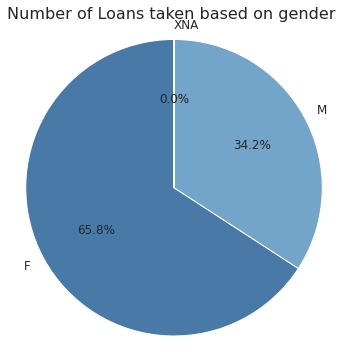

In [43]:



# First pie chart - loan data by gender
fig, ax = plt.subplots(figsize=(6, 6))

gender_counts = datasets["application_train"]['CODE_GENDER'].value_counts()
gender_labels = gender_counts.index
gender_sizes = gender_counts.values
colors = ["#497AA7", "#73A4CA"]
ax.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=colors)
# Add a common title for the figure
ax.set_title('Number of Loans taken based on gender ', fontsize=16)

# Set the aspect ratio to "equal" and the x and y limits to the same value to make it a perfect circle
ax.set_aspect('equal')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

# Show the plot
plt.show()

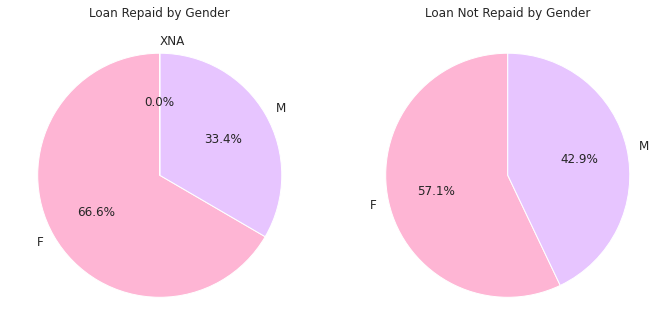

In [44]:
fig,(ax2,ax3)=plt.subplots(1,2, figsize=(10, 5))
colors = ['#FEB5D4', "#E7C5FF"]
# Second pie chart - loan repaid by gender
gender_loan_repaid = datasets["application_train"][datasets["application_train"]['TARGET'] == 0]
gender_loan_repaid_counts = gender_loan_repaid['CODE_GENDER'].value_counts()
gender_loan_repaid_labels = gender_loan_repaid_counts.index
gender_loan_repaid_sizes = gender_loan_repaid_counts.values
ax2.pie(gender_loan_repaid_sizes, labels=gender_loan_repaid_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=colors)
ax2.set_title('Loan Repaid by Gender')

# Third pie chart - loan not repaid by gender
gender_loan_not_repaid = datasets["application_train"][datasets["application_train"]['TARGET'] == 1]
gender_loan_not_repaid_counts = gender_loan_not_repaid['CODE_GENDER'].value_counts()
gender_loan_not_repaid_labels = gender_loan_not_repaid_counts.index
gender_loan_not_repaid_sizes = gender_loan_not_repaid_counts.values
ax3.pie(gender_loan_not_repaid_sizes, labels=gender_loan_not_repaid_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=colors)
ax3.set_title('Loan Not Repaid by Gender')



# Adjust the layout and spacing of the subplots
plt.tight_layout(pad=2)

# Show the plot
plt.show()

### **Observation**
- We can observe from the above pie charts that the number of loans taken out by women are almost twice as that of men
- The chances of loan repaid by females is also twice the amount than that for male
- The chances of loan not getting repaid is 10% more in female than male 

### Applicants age and whether they repaid loan or not 

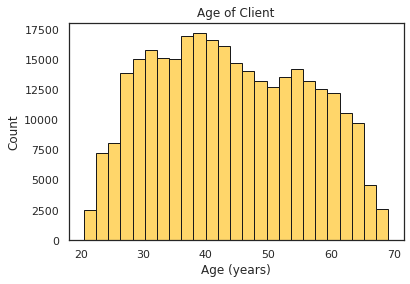

In [45]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25, color = "#FFD66A")
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

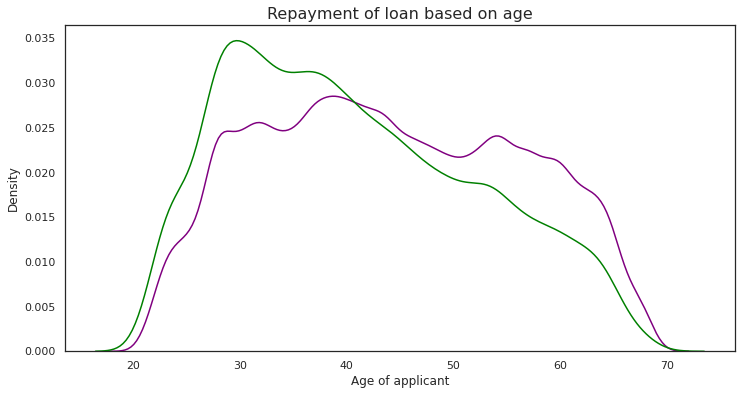

In [46]:
plt.figure(figsize = (12, 6))
sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET']==0, 'DAYS_BIRTH'] / -365, color='purple')
sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET']==1, 'DAYS_BIRTH'] / -365, color='green')
plt.xlabel('Age of applicant')
plt.title('Repayment of loan based on age', fontsize=16)
plt.show()

### **Observation** 
- In general most of the clients are in the age group of around 35-45 years
- 

### Applicants Housing Situation

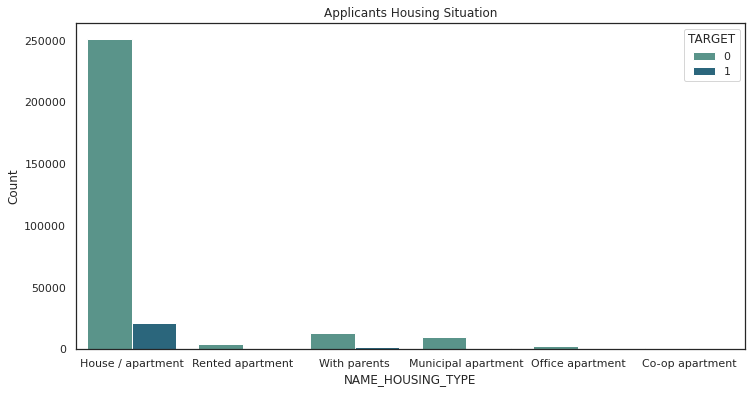

In [47]:
fig, axs = plt.subplots(ncols=1, figsize=(12, 6))

# Create a countplot of HOUSING_TYPE vs TARGET
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=datasets['application_train'], palette = 'crest')
axs.set_title('Applicants Housing Situation')

# Set the y-axis label
axs.set_ylabel('Count')

# Show the plot
plt.show()

### Loan repayment based on Car Ownership and Rental Property

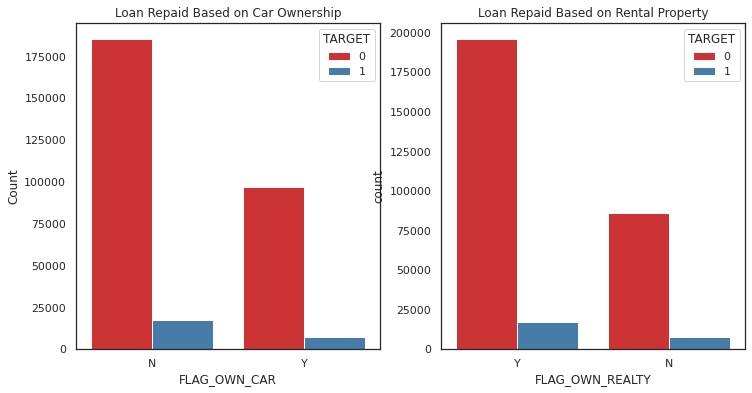

In [48]:
# Create a pair of subplots with a shared y-axis
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Create a countplot of OWN_CAR vs TARGET
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=datasets['application_train'], ax=axs[0],palette='Set1')
axs[0].set_title('Loan Repaid Based on Car Ownership')

# Create a countplot of RENTAL_PROPERTY vs TARGET
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=datasets['application_train'], ax=axs[1],palette='Set1')
axs[1].set_title('Loan Repaid Based on Rental Property')

# Set the y-axis label
axs[0].set_ylabel('Count')

# Show the plot
plt.show()


### **Observation**


### Repayment of Loan Based on the Loan Type

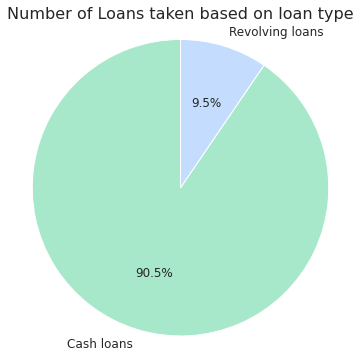

In [49]:
# First pie chart - loan data by type
fig, ax = plt.subplots(figsize=(6, 6))

loantype_counts = datasets["application_train"]['NAME_CONTRACT_TYPE'].value_counts()
loantype_labels = loantype_counts.index
loantype_sizes = loantype_counts.values
colors = ['#A7E8CB', '#C4DDFF']
ax.pie(loantype_sizes, labels=loantype_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=colors)
# Add a common title for the figure
ax.set_title('Number of Loans taken based on loan type', fontsize=16)

# Set the aspect ratio to "equal" and the x and y limits to the same value to make it a perfect circle
ax.set_aspect('equal')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

# Show the plot
plt.show()

### **Observation**

### Background of the Applicant

### Education

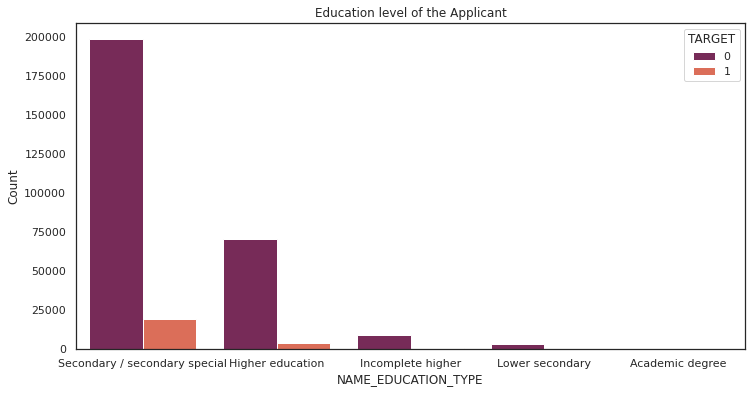

In [50]:
fig, axs = plt.subplots(ncols=1, figsize=(12, 6))

# Create a countplot of EDUCATION_TYPE vs TARGET
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=datasets['application_train'], palette = 'rocket')
axs.set_title('Education level of the Applicant')

# Set the y-axis label
axs.set_ylabel('Count')

# Show the plot
plt.show()

### Organisation

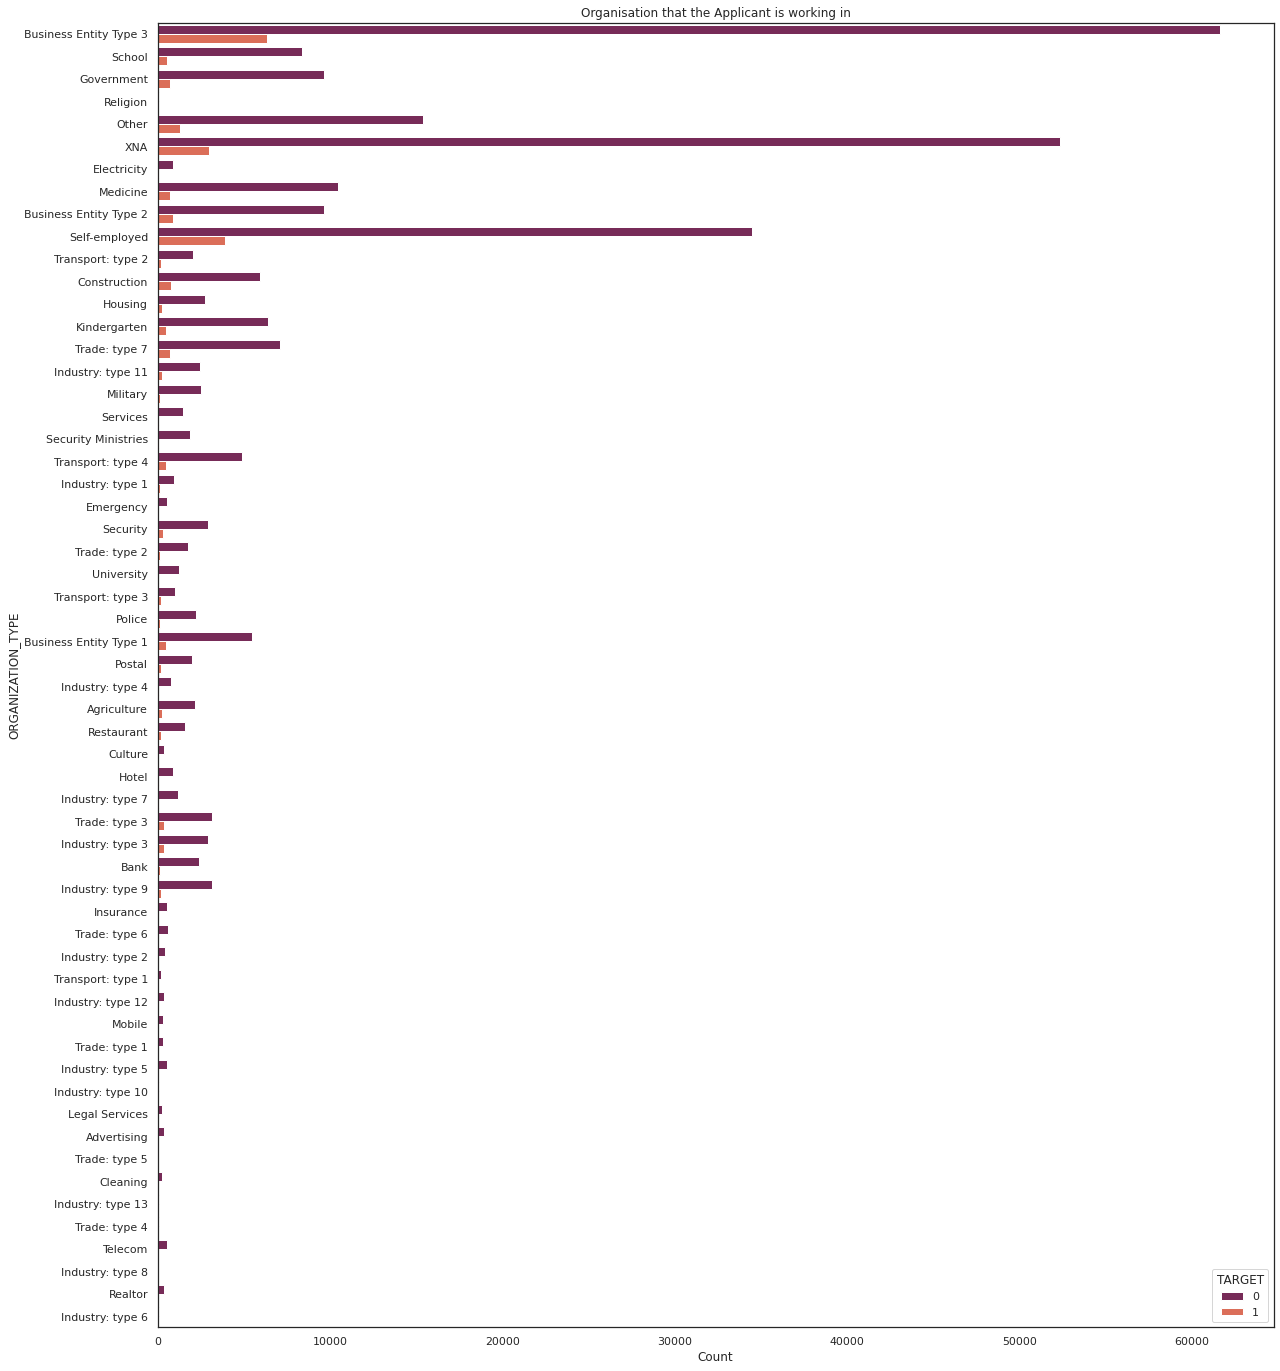

In [51]:
fig, axs = plt.subplots(ncols=1, figsize=(20, 24))

# Create a countplot of ORGANIZATION_TYPE vs TARGET
sns.countplot(y='ORGANIZATION_TYPE', hue='TARGET', data=datasets['application_train'], palette = 'rocket')
axs.set_title('Organisation that the Applicant is working in')

# Set the x-axis label
axs.set_xlabel('Count')

# Show the plot
plt.show()

### Occupation

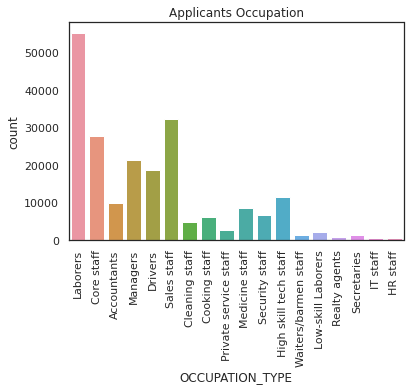

In [52]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

### Distribution Plots for AMT columns

### AMT Credit

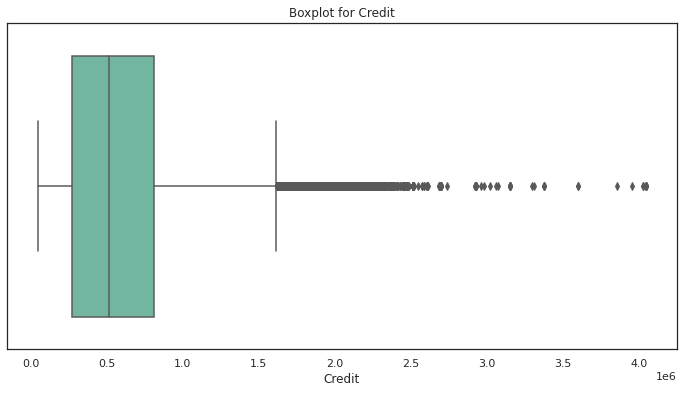

In [53]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x=datasets['application_train']['AMT_CREDIT'], palette='Set2') 
plt.xlabel('Credit')
plt.title('Boxplot for Credit') 
plt.show()

### AMT Annuity

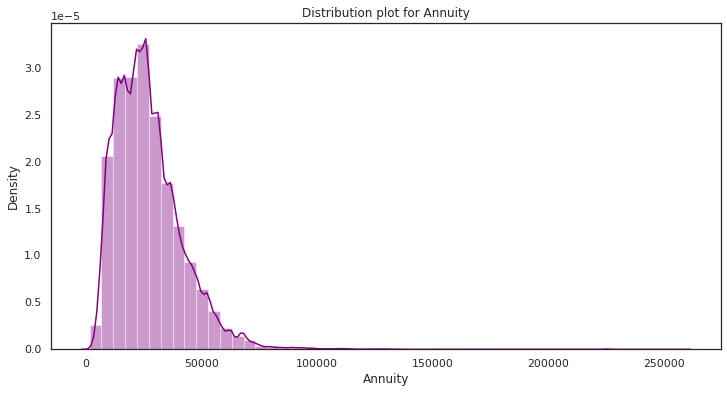

In [54]:
plt.figure(figsize=(12, 6)) 
sns.distplot(x=datasets['application_train']['AMT_ANNUITY'], color='purple') 
plt.xlabel('Annuity')
plt.title('Distribution plot for Annuity') 
plt.show()

### AMT Goods Price

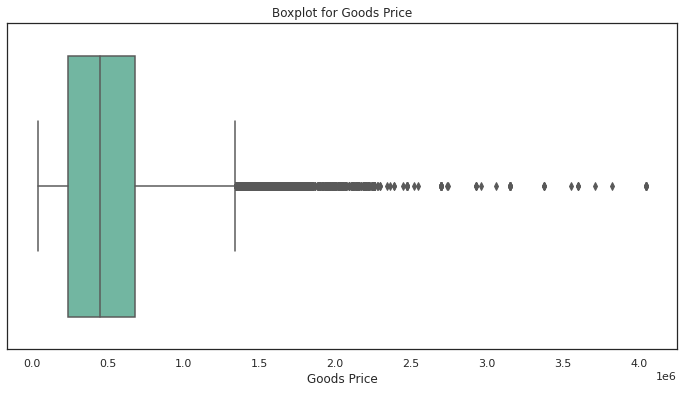

In [55]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x=datasets['application_train']['AMT_GOODS_PRICE'], palette='Set2') 
plt.xlabel('Goods Price')
plt.title('Boxplot for Goods Price') 
plt.show()

## Summary of Bureau

### Information about the bureau dataset

In [56]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### Statistical summary of the bureau dataset

In [57]:
datasets["bureau"].describe(include='all')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1716428,1716428,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1716428,1.716428e+06,4.896370e+05
unique,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN
top,NaN,NaN,Closed,currency 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer credit,NaN,NaN
freq,NaN,NaN,1079273,1715020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251615,NaN,NaN
mean,2.782149e+05,5.924434e+06,NaN,NaN,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,NaN,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,NaN,NaN,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,NaN,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,NaN,NaN,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,NaN,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,NaN,NaN,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,NaN,NaN,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,NaN,NaN,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,NaN,-3.300000e+01,1.350000e+04


### Percentage and count of missing values in each column of the bureau dataset

In [58]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
total_count_with = datasets["bureau"].isnull().count()
total_count_without = datasets["bureau"].count()
missing_application_train_data  = pd.concat([percent, sum_missing, total_count_without, total_count_with], axis=1, keys=['Percent', 'Missing Count', 'Total Count without Missing value', 'Total Count'])
missing_application_train_data

,Percent,Missing Count,Total Count without Missing value,Total Count
AMT_ANNUITY,71.47,1226791,489637,1716428
AMT_CREDIT_MAX_OVERDUE,65.51,1124488,591940,1716428
DAYS_ENDDATE_FACT,36.92,633653,1082775,1716428
AMT_CREDIT_SUM_LIMIT,34.48,591780,1124648,1716428
AMT_CREDIT_SUM_DEBT,15.01,257669,1458759,1716428
DAYS_CREDIT_ENDDATE,6.15,105553,1610875,1716428
AMT_CREDIT_SUM,0.00,13,1716415,1716428
CREDIT_TYPE,0.00,0,1716428,1716428
AMT_CREDIT_SUM_OVERDUE,0.00,0,1716428,1716428
CNT_CREDIT_PROLONG,0.00,0,1716428,1716428


### Bar plot to visualize the percentage of missing data for each features of bureau dataset

Text(0, 0.5, 'Features')

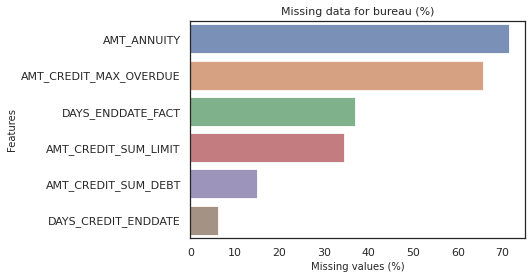

In [59]:
percent = (datasets['bureau'].isnull().sum()/datasets['bureau'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['bureau'].isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data=missing_data[missing_data['Percent'] > 0]
f, ax = plt.subplots()
plt.title(f'Missing data for bureau (%)', fontsize=11)
fig=sns.barplot(x = missing_data["Percent"],y = missing_data.index ,alpha=0.8)
plt.xlabel('Missing values (%)', fontsize=10)
plt.ylabel('Features', fontsize=10)

### Merging bureau and application_train based on SK_ID_CURR

In [60]:
bureau_df = datasets['bureau']
application_train_df = datasets['application_train']
merged_df = application_train_df[['SK_ID_CURR', 'TARGET']].merge(bureau_df, on='SK_ID_CURR', how='left')

merged_df.head(5)

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,6158904.0,Closed,currency 1,-1125.0,0.0,-1038.0,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,6158905.0,Closed,currency 1,-476.0,0.0,NaN,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,6158906.0,Closed,currency 1,-1437.0,0.0,-1072.0,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,6158907.0,Closed,currency 1,-1121.0,0.0,-911.0,-911.0,3321.000,0.0,19071.0,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,6158908.0,Closed,currency 1,-645.0,0.0,85.0,-36.0,5043.645,0.0,120735.0,0.0,0.0,0.0,Consumer credit,-34.0,0.0


### Correlation matrix for merged dataframe

<AxesSubplot:>

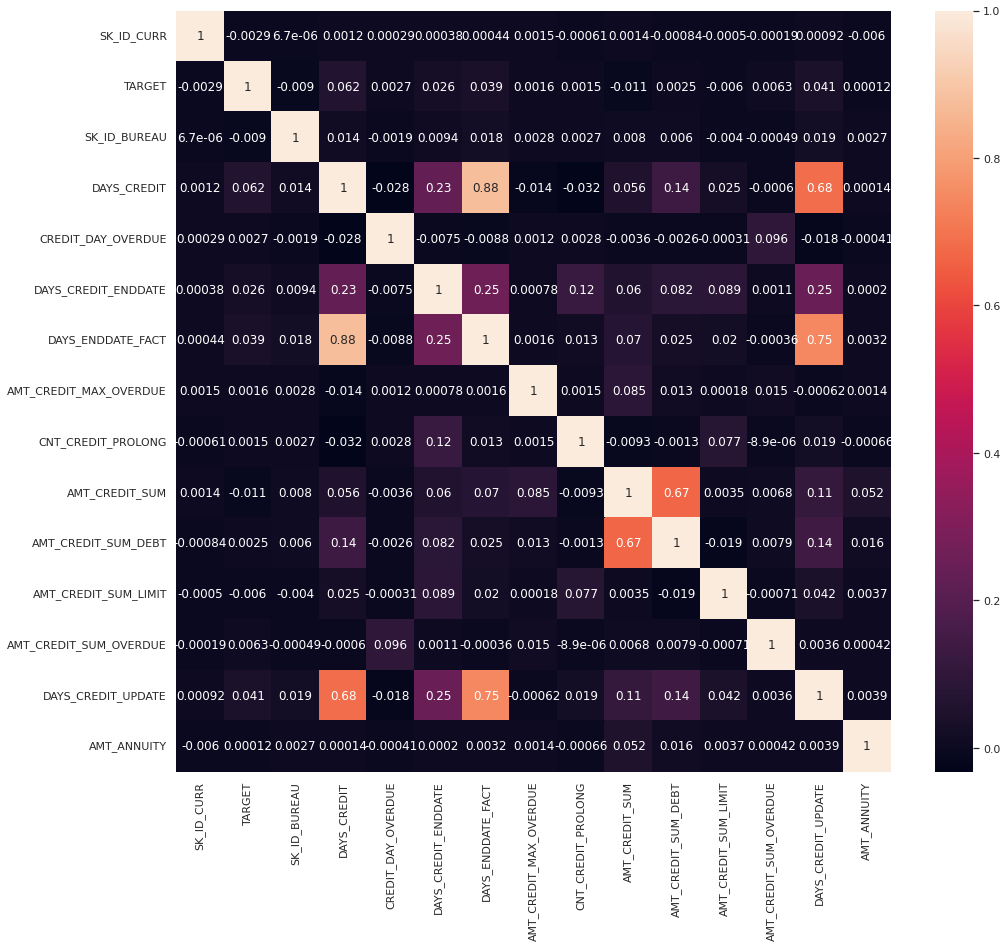

In [61]:
fig = plt.figure(figsize=(16,14))
sns.heatmap(merged_df.corr(), annot=True)

### **Observation**:

- The DAYS_CREDIT and DAYS_CREDIT_UPDATE columns from bureau_df have weak positive correlations with the TARGET column from application_train_df. This suggests that as the number of days since the last credit inquiry or the number of days until the end of a credit agreement increases, the probability of the loan not being repaid may increase.

### Scatterplot for DAYS_CREDIT and DAYS_ENDDATE_FACT column with respect to the TARGET column

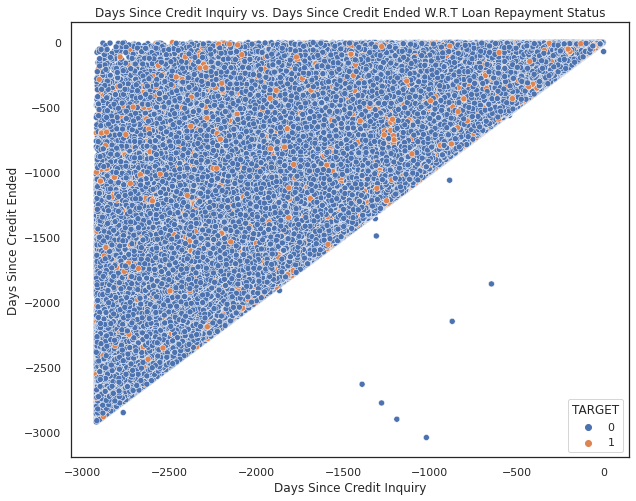

In [62]:
# Removing the outlier which was affecting our plot
merged_df = merged_df[merged_df["SK_ID_CURR"] != 104463]  
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "DAYS_CREDIT", y='DAYS_ENDDATE_FACT', hue='TARGET' ,data=merged_df)
plt.title('Days Since Credit Inquiry vs. Days Since Credit Ended W.R.T Loan Repayment Status')
plt.xlabel('Days Since Credit Inquiry')
plt.ylabel('Days Since Credit Ended')
plt.show()

### **Observation**:

- We can see the points clustering along a diagonal line running from bottom left to the top right of the plot.
- We can see that as the number of days since the credit inquiry increases, so does the number of days since the credit line ended.
- Since the plot also shows a large spread of points with varying repayment status, we can say that there is no clear correlation between these variables and the loan repayment behavior

## Summary of Bureau Balance

### Information about the bureau_balance dataset

In [63]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


### Statistical summary of the bureau_balance dataset

In [64]:
datasets["bureau_balance"].describe(include='all')

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,27299925
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,13646993
mean,6.036297e+06,-3.074169e+01,NaN
std,4.923489e+05,2.386451e+01,NaN
min,5.001709e+06,-9.600000e+01,NaN
25%,5.730933e+06,-4.600000e+01,NaN
50%,6.070821e+06,-2.500000e+01,NaN
75%,6.431951e+06,-1.100000e+01,NaN


### Percentage and count of missing values in each column of the bureau_balance dataset

In [65]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
total_count_with = datasets["bureau_balance"].isnull().count()
total_count_without = datasets["bureau_balance"].count()
missing_application_train_data  = pd.concat([percent, sum_missing, total_count_without, total_count_with], axis=1, keys=['Percent', 'Missing Count', 'Total Count without Missing value', 'Total Count'])
missing_application_train_data

,Percent,Missing Count,Total Count without Missing value,Total Count
STATUS,0.0,0,27299925,27299925
MONTHS_BALANCE,0.0,0,27299925,27299925
SK_ID_BUREAU,0.0,0,27299925,27299925


### Merging bureau_balance and merged bureau/application_train based on SK_ID_BUREAU

In [66]:
bureau_balance_df = datasets['bureau_balance']
bureau_balance_merged_df = merged_df[['SK_ID_BUREAU', 'TARGET']].merge(bureau_balance_df, on='SK_ID_BUREAU', how='left')

bureau_balance_merged_df.head(5)

,SK_ID_BUREAU,TARGET,MONTHS_BALANCE,STATUS
0,6158904.0,1,-15.0,C
1,6158904.0,1,-16.0,C
2,6158904.0,1,-17.0,0
3,6158904.0,1,-18.0,0
4,6158904.0,1,-19.0,0


### Correlation matrix for bureau_balance_merged dataframe

<AxesSubplot:>

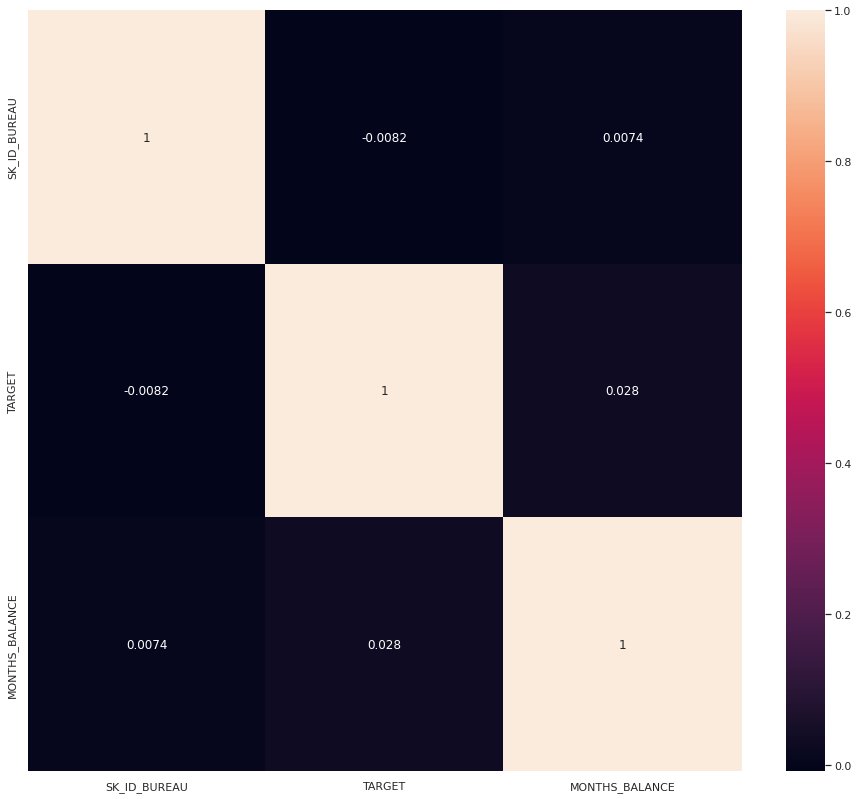

In [67]:
fig = plt.figure(figsize=(16,14))
sns.heatmap(bureau_balance_merged_df.corr(), annot=True)

### **Observation**:
- The strongest positive correlation is between the MONTHS_BALANCE column and the TARGET column, which suggests that the target variable may be related to the duration of the credit history

## Summary of Credit Card Balance

### Information about the credit_card_balance dataset

In [68]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

### Statistical summary of the credit_card_balance dataset

In [69]:
datasets["credit_card_balance"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3840312,3.840312e+06,3.840312e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698436,NaN,NaN
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,NaN,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,NaN,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,NaN,0.000000e+00,0.000000e+00


### Percentage and count of missing values in each column of the credit_card_balance dataset

In [70]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
total_count_with = datasets["credit_card_balance"].isnull().count()
total_count_without = datasets["credit_card_balance"].count()
missing_application_train_data  = pd.concat([percent, sum_missing, total_count_without, total_count_with], axis=1, keys=['Percent', 'Missing Count', 'Total Count without Missing value', 'Total Count'])
missing_application_train_data

,Percent,Missing Count,Total Count without Missing value,Total Count
AMT_PAYMENT_CURRENT,20.00,767988,3072324,3840312
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816,3090496,3840312
CNT_DRAWINGS_POS_CURRENT,19.52,749816,3090496,3840312
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816,3090496,3840312
CNT_DRAWINGS_ATM_CURRENT,19.52,749816,3090496,3840312
AMT_DRAWINGS_ATM_CURRENT,19.52,749816,3090496,3840312
AMT_DRAWINGS_POS_CURRENT,19.52,749816,3090496,3840312
CNT_INSTALMENT_MATURE_CUM,7.95,305236,3535076,3840312
AMT_INST_MIN_REGULARITY,7.95,305236,3535076,3840312
SK_DPD_DEF,0.00,0,3840312,3840312


### Bar plot to visualize the percentage of missing data for each features of credit_card_balance dataset

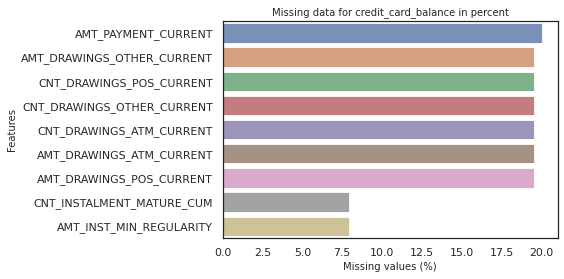

In [71]:
percent = (datasets['credit_card_balance'].isnull().sum()/datasets['credit_card_balance'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['credit_card_balance'].isna().sum().sort_values(ascending = False)
missing_data = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data = missing_data[missing_data['Percent'] > 0]
plt.title(f'Missing data for credit_card_balance in percent', fontsize=10)
sns.barplot(x = missing_data["Percent"],y = missing_data.index ,alpha=0.8)
plt.xlabel('Missing values (%)', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()

### Histogram of the distribution of the AMT_PAYMENT_TOTAL_CURRENT feature

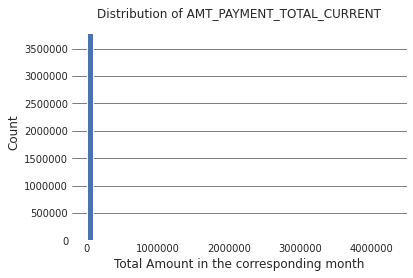

In [72]:
fig, ax = plt.subplots()
ax.hist(datasets['credit_card_balance']['AMT_PAYMENT_TOTAL_CURRENT'], bins=50)
ax.set_title('Distribution of AMT_PAYMENT_TOTAL_CURRENT')
plt.xlabel("Total Amount in the corresponding month")
plt.ylabel("Count")
ax.tick_params(labelsize=10,length=0)
plt.box(False)
plt.ticklabel_format(style='plain', axis='y')
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)

### **Observation**:

- We can observe that there is a high count of credit card payments with a total amount of 0, which could suggest that many credit card holders either did not make a payment or paid the minimum amount due for that particular month.

### Distribution of AMT_CREDIT_LIMIT_ACTUAL feature

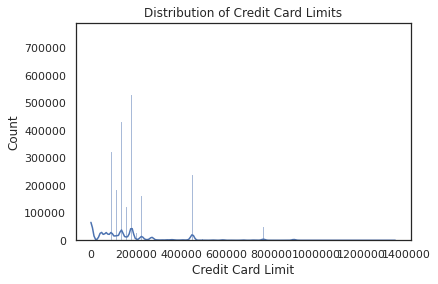

In [73]:
fig, ax = plt.subplots()
sns.histplot(data=datasets['credit_card_balance'], x='AMT_CREDIT_LIMIT_ACTUAL', kde=True)
plt.title('Distribution of Credit Card Limits')
plt.xlabel('Credit Card Limit')
plt.ylabel('Count')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

### **Observation**:

- We can observe that there is more area between 0 and 200000 may suggest that borrowers tend to have lower outstanding balances and make smaller payments, rather than carrying large balances and making large payments.

### Scatter plot to show the relationship between the AMT_CREDIT_LIMIT_ACTUAL and AMT_BALANCE

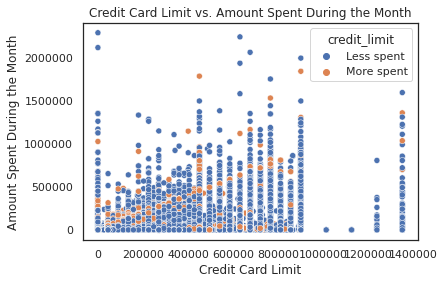

In [74]:
fig, ax = plt.subplots()
datasets['credit_card_balance']["credit_limit"] = datasets['credit_card_balance']["AMT_CREDIT_LIMIT_ACTUAL"] >= datasets['credit_card_balance']["AMT_BALANCE"]
datasets['credit_card_balance']["credit_limit"] = datasets['credit_card_balance']["credit_limit"].apply(lambda x: "Less spent" if x == True else "More spent")
sns.scatterplot(data=datasets['credit_card_balance'], x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_DRAWINGS_CURRENT', hue = "credit_limit")
plt.title('Credit Card Limit vs. Amount Spent During the Month')
plt.xlabel('Credit Card Limit')
plt.ylabel('Amount Spent During the Month')
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

### **Observation**:

- This indicates that in most cases, the credit limit of the cardholders is sufficient to cover the amount spent during the month. 

### Merging credit_card_balance and application_train based on SK_ID_CURR

In [75]:
merged_df = datasets['application_train'][['SK_ID_CURR', 'TARGET']].merge(datasets['credit_card_balance'], on='SK_ID_CURR', how='left')
merged_df.head(5)

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,credit_limit
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1489396.0,-2.0,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0,Less spent
4,100006,0,1489396.0,-1.0,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0,Less spent


### Correlation of TARGET feature with credit_card_balance dataset

In [76]:
merged_df.corr()['TARGET'].sort_values(ascending= False)

TARGET                        1.000000
AMT_BALANCE                   0.050098
AMT_TOTAL_RECEIVABLE          0.049839
AMT_RECIVABLE                 0.049803
AMT_RECEIVABLE_PRINCIPAL      0.049692
AMT_INST_MIN_REGULARITY       0.039798
CNT_DRAWINGS_ATM_CURRENT      0.038437
CNT_DRAWINGS_CURRENT          0.037793
MONTHS_BALANCE                0.035695
CNT_DRAWINGS_POS_CURRENT      0.029536
AMT_DRAWINGS_ATM_CURRENT      0.024700
AMT_DRAWINGS_CURRENT          0.022378
AMT_CREDIT_LIMIT_ACTUAL       0.013823
AMT_PAYMENT_CURRENT           0.012929
AMT_PAYMENT_TOTAL_CURRENT     0.012302
SK_DPD_DEF                    0.010538
AMT_DRAWINGS_POS_CURRENT      0.005084
AMT_DRAWINGS_OTHER_CURRENT    0.003843
CNT_DRAWINGS_OTHER_CURRENT    0.003044
SK_ID_PREV                    0.002571
SK_DPD                        0.001684
SK_ID_CURR                   -0.004412
CNT_INSTALMENT_MATURE_CUM    -0.023684
Name: TARGET, dtype: float64

### Correlation of credit_card_balance dataset

<AxesSubplot:>

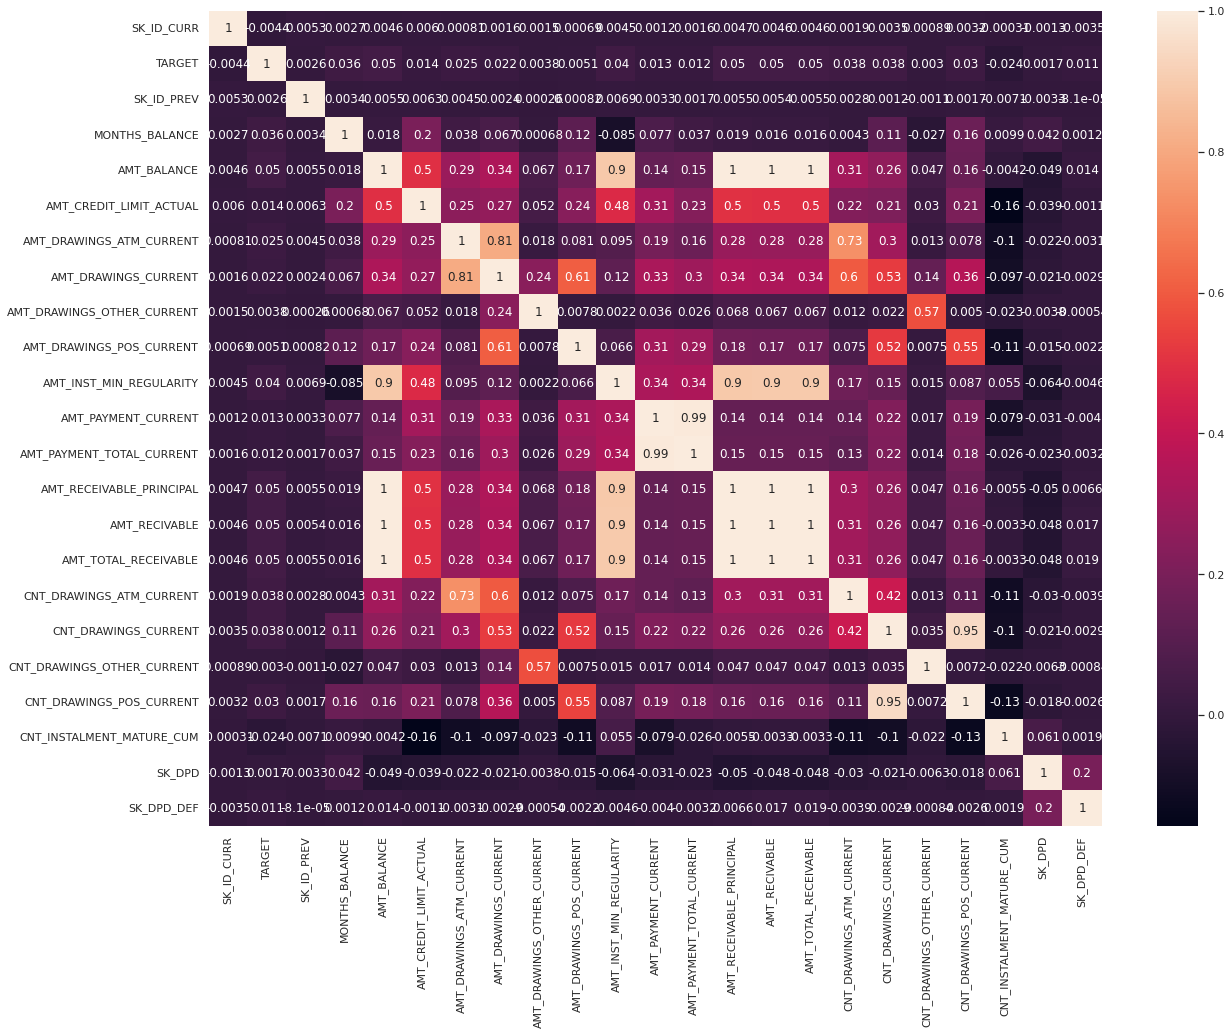

In [77]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(merged_df.corr(), annot=True)

### **Observation**:

- The insight from the correlation matrix is that there are weak positive correlations between the TARGET column and the credit card features in the merged dataset.

- The AMT_BALANCE, AMT_TOTAL_RECEIVABLE, AMT_RECIVABLE, and AMT_RECEIVABLE_PRINCIPAL columns have the highest correlation with the TARGET column, indicating that borrowers with higher credit card balances and receivables are more likely to default on their loans.

- Other features such as AMT_INST_MIN_REGULARITY, CNT_DRAWINGS_ATM_CURRENT, and CNT_DRAWINGS_CURRENT also have a weak correlation with the TARGET column. Based on these correlations, it may be important to consider credit card balance and receivables as key features in predicting loan defaults. This suggests that borrowers who make smaller minimum payments on their credit cards, as well as those who make more ATM withdrawals and overall credit card drawings, may be more likely to have difficulty repaying their loans.

## Summary of Previous Application

In [78]:
edaPAdf = pd.DataFrame()

In [79]:
edaPAdf['SK_ID_CURR'] = datasets['application_train']['SK_ID_CURR']
edaPAdf['TARGET'] = datasets['application_train']['TARGET']

In [80]:
datasets['previous_application'].shape

(1670214, 37)

In [81]:
datasets['previous_application'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [82]:
datasets['previous_application'].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [83]:
datasets['previous_application'].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,1670214,1.670214e+06,774370.000000,5951.000000,5951.000000,1670214,1670214,1.670214e+06,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1.670214e+06,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,2,NaN,NaN,NaN,NaN,25,4,NaN,4,9,7,4,28,5,3,8,NaN,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,1661739,NaN,NaN,NaN,NaN,922661,1036781,NaN,1033552,1353093,508970,1231261,950809,691011,1063666,719968,NaN,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,NaN,9.964675e-01,0.079637,0.188357,0.773503,NaN,NaN,-8.806797e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.139511e+02,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,NaN,5.932963e-02,0.107823,0.087671,0.100879,NaN,NaN,7.790997e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.127443e+03,NaN,1.456729e+01,NaN,NaN,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,-0.000015,0.034781,0.373150,NaN,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,NaN,1.000000e+00,0.000000,0.160716,0.715645,NaN,NaN,-1.300000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,NaN,1.000000e+00,0.051605,0.189122,0.835095,NaN,NaN,-5.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,NaN,1.000000e+00,0.108909,0.193330,0.852537,NaN,NaN,-2.800000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000e+01,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


### **Missing Values for Previous Application**

In [84]:
edaPAdf = edaPAdf.merge(datasets["previous_application"], how='left', on='SK_ID_CURR')

In [85]:
percent = (edaPAdf.isnull().sum()/edaPAdf.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = edaPAdf.isna().sum().sort_values(ascending = False)
missing_previous_application_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_previous_application_data.head(20)

,Percent,Missing Count
RATE_INTEREST_PRIVILEGED,99.67,1425364
RATE_INTEREST_PRIMARY,99.67,1425364
RATE_DOWN_PAYMENT,53.56,765994
AMT_DOWN_PAYMENT,53.56,765994
NAME_TYPE_SUITE,49.72,711126
DAYS_TERMINATION,40.38,577560
NFLAG_INSURED_ON_APPROVAL,40.38,577560
DAYS_FIRST_DRAWING,40.38,577560
DAYS_FIRST_DUE,40.38,577560
DAYS_LAST_DUE_1ST_VERSION,40.38,577560


Number of columns with missing value greater than 0: 36
Number of columns with more than 60% missing values: 2


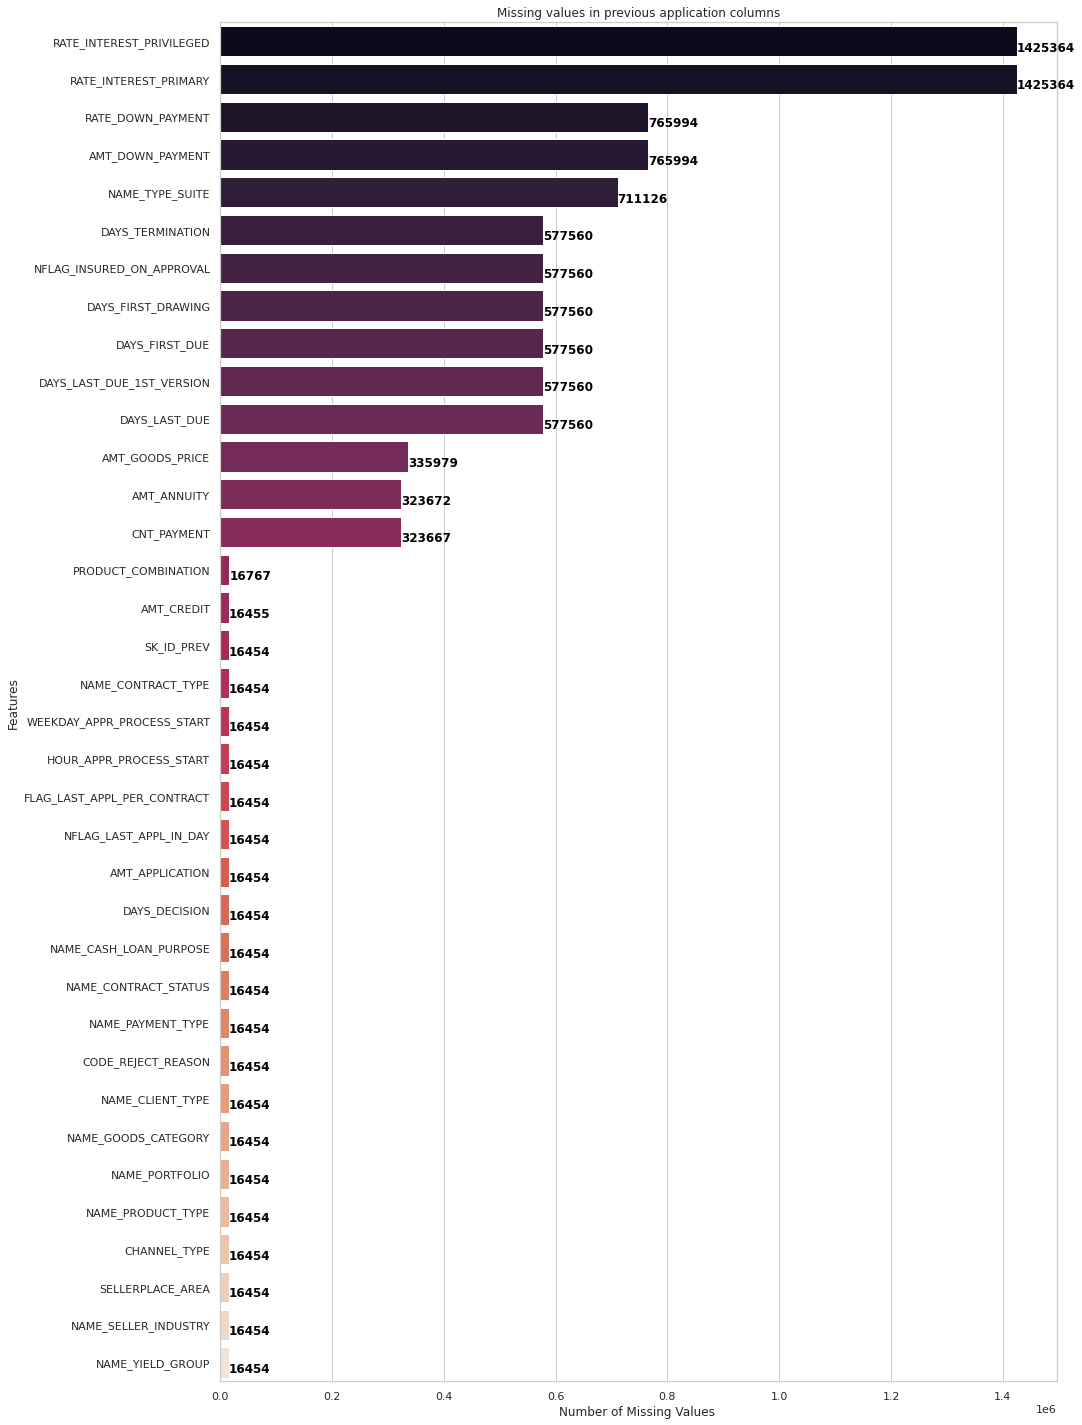

In [86]:
# Filter rows with count of missing values greater than 0
missing_previous_application_data = missing_previous_application_data[missing_previous_application_data['Missing Count'] > 0]
print("Number of columns with missing value greater than 0:",len(missing_previous_application_data))
missing_more_than_60=missing_previous_application_data[missing_previous_application_data['Percent'] >=60]
print("Number of columns with more than 60% missing values:", len(missing_more_than_60))

plt.figure(figsize=(15, 25))

sns.set_style("whitegrid")
ax = sns.barplot(x="Missing Count", y=missing_previous_application_data.index, data=missing_previous_application_data,
                 palette="rocket")

# Set the figure size and axis labels

ax.set_xlabel("Number of Missing Values ")
ax.set_ylabel("Features")

plt.title('Missing values in previous application columns')

# Add values to the bars
for i, v in enumerate(missing_previous_application_data['Missing Count']):
    ax.text(v + 10, i + .25, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

### **Correlation with the Target column**

In [87]:
edaPAdf.corr()['TARGET']

SK_ID_CURR                  -0.001216
TARGET                       1.000000
SK_ID_PREV                   0.002009
AMT_ANNUITY                 -0.014922
AMT_APPLICATION             -0.005583
AMT_CREDIT                  -0.002350
AMT_DOWN_PAYMENT            -0.016918
AMT_GOODS_PRICE              0.000254
HOUR_APPR_PROCESS_START     -0.027809
NFLAG_LAST_APPL_IN_DAY      -0.002887
RATE_DOWN_PAYMENT           -0.026111
RATE_INTEREST_PRIMARY       -0.001470
RATE_INTEREST_PRIVILEGED     0.028640
DAYS_DECISION                0.039901
SELLERPLACE_AREA            -0.002539
CNT_PAYMENT                  0.030480
DAYS_FIRST_DRAWING          -0.031154
DAYS_FIRST_DUE              -0.006651
DAYS_LAST_DUE_1ST_VERSION    0.018021
DAYS_LAST_DUE                0.017522
DAYS_TERMINATION             0.016981
NFLAG_INSURED_ON_APPROVAL    0.000653
Name: TARGET, dtype: float64

<AxesSubplot:>

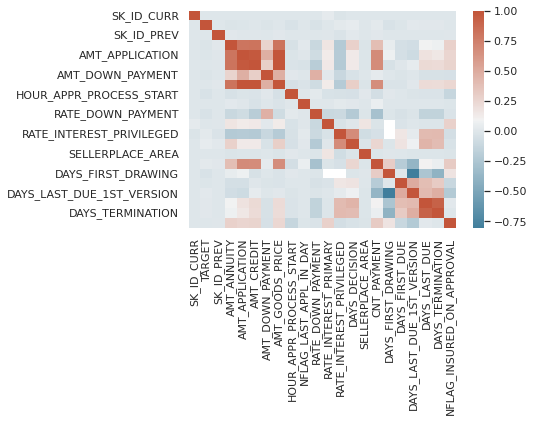

In [88]:
correlations = edaPAdf.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, cmap = cmap)

### **Contact type of the previous applications**

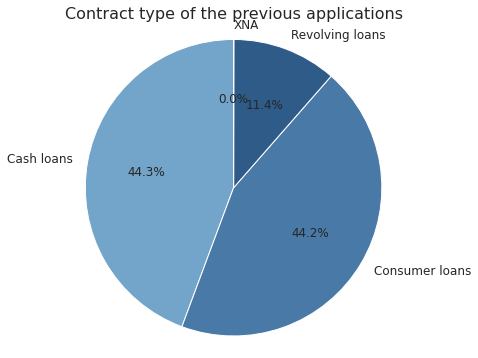

In [89]:
fig, ax = plt.subplots(figsize=(6, 6))

contract_type_counts = edaPAdf['NAME_CONTRACT_TYPE'].value_counts()
contract_type_labels = contract_type_counts.index
contract_type_sizes = contract_type_counts.values
colors = ["#73A4CA", "#497AA7", "#2E5B88"]
ax.pie(contract_type_sizes, labels=contract_type_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, colors=colors)
# Add a common title for the figure
ax.set_title('Contract type of the previous applications', fontsize=16)

# Set the aspect ratio to "equal" and the x and y limits to the same value to make it a perfect circle
ax.set_aspect('equal')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

# Show the plot
plt.show()

### **Contract Status of the previous application**

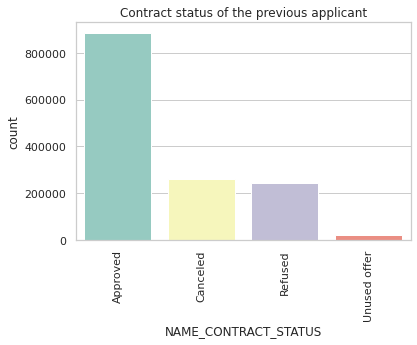

In [90]:
sns.countplot(x='NAME_CONTRACT_STATUS', data=edaPAdf, palette = "Set3");
plt.title('Contract status of the previous applicant');
plt.xticks(rotation=90);

### **Was the client old or new**

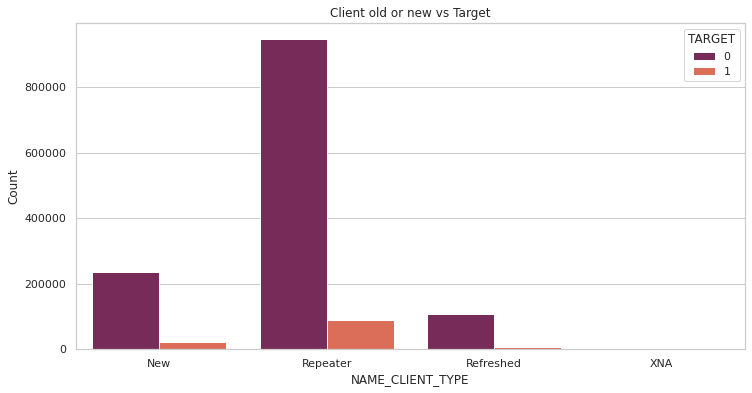

In [91]:
fig, axs = plt.subplots(ncols=1, figsize=(12, 6))
sns.countplot(x='NAME_CLIENT_TYPE', hue='TARGET', data=edaPAdf, palette = 'rocket')
axs.set_title('Client old or new vs Target')
axs.set_ylabel('Count')
plt.show()

### **Final credit amount on the previous application**

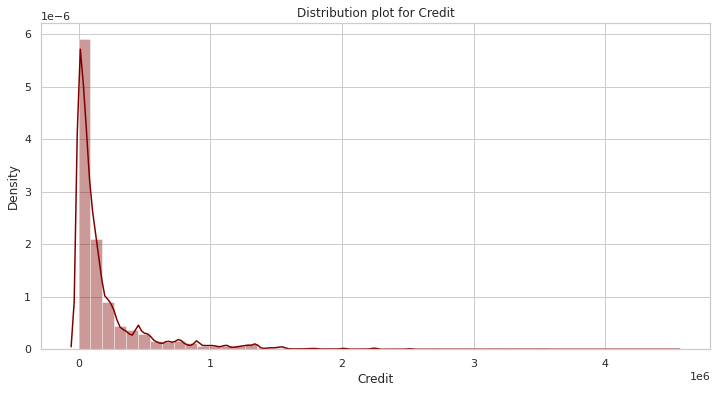

In [92]:
plt.figure(figsize=(12, 6)) 
sns.distplot(x=edaPAdf['AMT_CREDIT'], color='maroon') 
plt.xlabel('Credit')
plt.title('Distribution plot for Credit') 
plt.show()

## Summary of POS Cash Balance

In [93]:
edaPCBdf = pd.DataFrame()

In [94]:
edaPCBdf['SK_ID_CURR'] = datasets['application_train']['SK_ID_CURR']
edaPCBdf['TARGET'] = datasets['application_train']['TARGET']

In [95]:
datasets['POS_CASH_balance'].shape

(10001358, 8)

In [96]:
datasets['POS_CASH_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [97]:
datasets['POS_CASH_balance'].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [98]:
datasets['POS_CASH_balance'].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


### **Missing Values for POS CASH Balance**

In [99]:
edaPCBdf = edaPCBdf.merge(datasets["POS_CASH_balance"], how='left', on='SK_ID_CURR')

In [100]:
percent = (edaPCBdf.isnull().sum()/edaPCBdf.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = edaPCBdf.isna().sum().sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_POS_CASH_balance_data.head(20)

,Percent,Missing Count
CNT_INSTALMENT_FUTURE,0.47,39945
CNT_INSTALMENT,0.47,39930
SK_DPD_DEF,0.21,18067
SK_DPD,0.21,18067
NAME_CONTRACT_STATUS,0.21,18067
MONTHS_BALANCE,0.21,18067
SK_ID_PREV,0.21,18067
TARGET,0.00,0
SK_ID_CURR,0.00,0


Number of columns with missing value greater than 0: 7
Number of columns with more than 60% missing values: 0


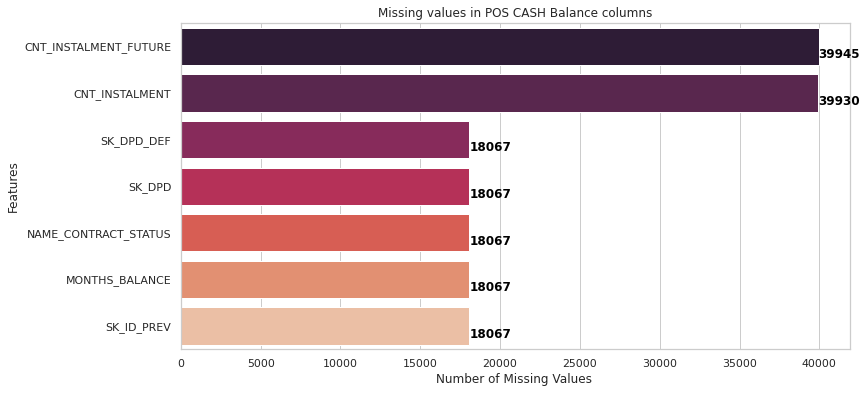

In [101]:
# Filter rows with count of missing values greater than 0
missing_POS_CASH_balance_data = missing_POS_CASH_balance_data[missing_POS_CASH_balance_data['Missing Count'] > 0]
print("Number of columns with missing value greater than 0:",len(missing_POS_CASH_balance_data))
missing_more_than_60=missing_POS_CASH_balance_data[missing_POS_CASH_balance_data['Percent'] >=60]
print("Number of columns with more than 60% missing values:", len(missing_more_than_60))

plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
ax = sns.barplot(x="Missing Count", y=missing_POS_CASH_balance_data.index, data=missing_POS_CASH_balance_data,
                 palette="rocket")

# Set the figure size and axis labels

ax.set_xlabel("Number of Missing Values ")
ax.set_ylabel("Features")

plt.title('Missing values in POS CASH Balance columns')

# Add values to the bars
for i, v in enumerate(missing_POS_CASH_balance_data['Missing Count']):
    ax.text(v + 10, i + .25, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

### **Correlation with the Target column**

In [102]:
edaPCBdf.corr()['TARGET']

SK_ID_CURR              -0.002244
TARGET                   1.000000
SK_ID_PREV              -0.000056
MONTHS_BALANCE           0.020147
CNT_INSTALMENT           0.018506
CNT_INSTALMENT_FUTURE    0.021972
SK_DPD                   0.009866
SK_DPD_DEF               0.008594
Name: TARGET, dtype: float64

<AxesSubplot:>

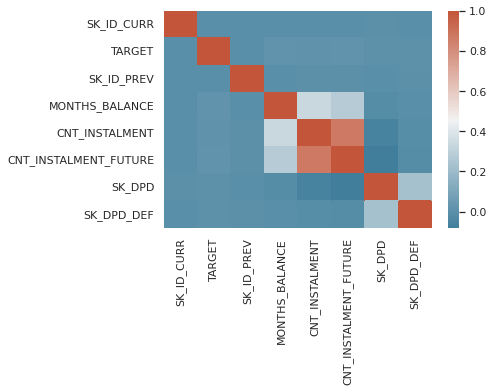

In [103]:
correlations = edaPCBdf.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, cmap = cmap)

### **Installments left to pay on previous credit vs Target**

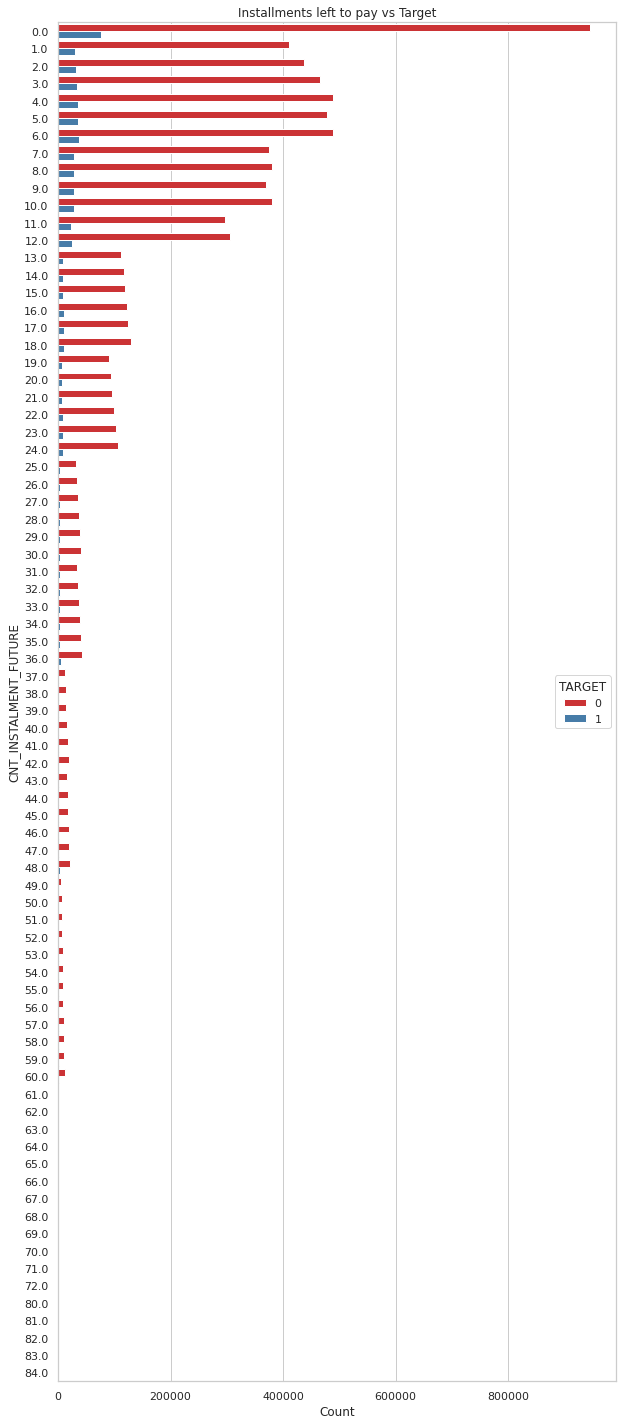

In [104]:
fig, axs = plt.subplots(ncols=1, figsize=(10, 25))
sns.countplot(y='CNT_INSTALMENT_FUTURE', hue='TARGET', data=edaPCBdf, palette = 'Set1')
axs.set_title('Installments left to pay vs Target')
axs.set_xlabel('Count')
plt.show()

### **Contract status during the month**

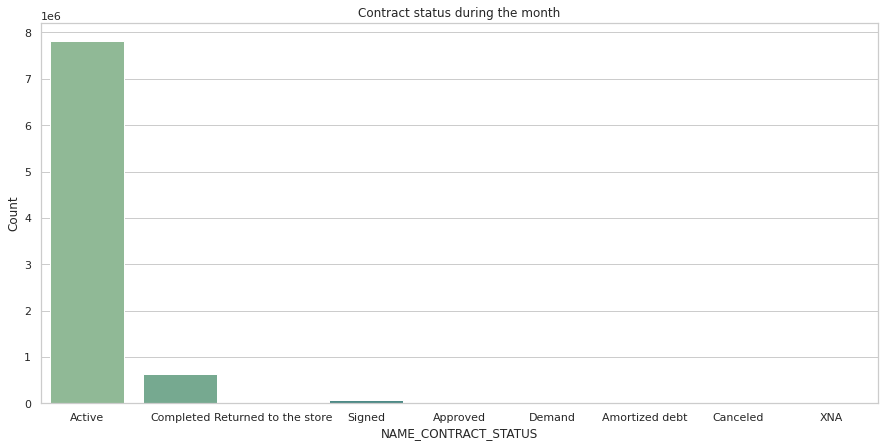

In [105]:
fig, axs = plt.subplots(ncols=1, figsize=(15, 7))
sns.countplot(x='NAME_CONTRACT_STATUS', data=edaPCBdf, palette = 'crest')
axs.set_title('Contract status during the month')
axs.set_ylabel('Count')
plt.show()

## Summary of Installments Payments

### Information about the installments_payments dataset

In [106]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


### Statistical summary of the installments_payments dataset

In [107]:
datasets["installments_payments"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### Percentage and count of missing values in each column of the installments_payments dataset

In [108]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
total_count_with = datasets["installments_payments"].isnull().count()
total_count_without = datasets["installments_payments"].count()
missing_application_train_data  = pd.concat([percent, sum_missing, total_count_without, total_count_with], axis=1, keys=['Percent', 'Missing Count', 'Total Count without Missing value', 'Total Count'])
missing_application_train_data

,Percent,Missing Count,Total Count without Missing value,Total Count
AMT_PAYMENT,0.02,2905,13602496,13605401
DAYS_ENTRY_PAYMENT,0.02,2905,13602496,13605401
AMT_INSTALMENT,0.00,0,13605401,13605401
DAYS_INSTALMENT,0.00,0,13605401,13605401
NUM_INSTALMENT_NUMBER,0.00,0,13605401,13605401
NUM_INSTALMENT_VERSION,0.00,0,13605401,13605401
SK_ID_CURR,0.00,0,13605401,13605401
SK_ID_PREV,0.00,0,13605401,13605401


### Bar plot to visualize the percentage of missing data for each features of installments_payments dataset

Text(0, 0.5, 'Features')

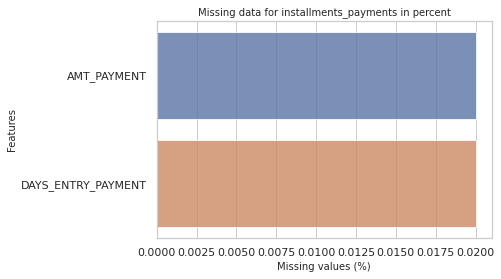

In [109]:
percent = (datasets['installments_payments'].isnull().sum()/datasets['installments_payments'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['installments_payments'].isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data=missing_data[missing_data['Percent'] > 0]
fig, ax = plt.subplots()
plt.title(f'Missing data for installments_payments in percent', fontsize=10)
sns.barplot(x = missing_data["Percent"],y = missing_data.index ,alpha=0.8)
plt.xlabel('Missing values (%)', fontsize=10)
plt.ylabel('Features', fontsize=10)

### Pie chart to show the relationship between the AMT_PAYMENT and AMT_INSTALMENT

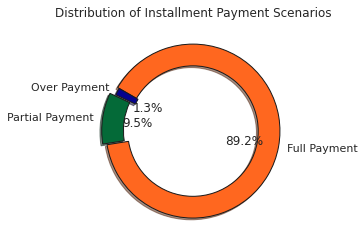

In [110]:
inst_pay = pd.DataFrame()
inst_pay['AMT_DIFF'] = datasets["installments_payments"]['AMT_INSTALMENT'] - datasets["installments_payments"]['AMT_PAYMENT']
inst_pay['OVER_PAYMENT'] = inst_pay['AMT_DIFF'].apply(lambda x: 1 if x < 0 else 0)
inst_pay['PARTIAL_PAYMENT'] = inst_pay['AMT_DIFF'].apply(lambda x: 1 if x > 0 else 0)
inst_pay['FULL_PAYMENT'] = inst_pay['AMT_DIFF'].apply(lambda x: 1 if x == 0 else 0)

full_payment_pct = inst_pay['FULL_PAYMENT'].sum() / inst_pay.shape[0] * 100
partial_payment_pct = inst_pay['PARTIAL_PAYMENT'].sum() / inst_pay.shape[0] * 100
over_payment_pct = inst_pay['OVER_PAYMENT'].sum() / inst_pay.shape[0] * 100

labels = ['Full Payment', 'Partial Payment', 'Over Payment']
x = [full_payment_pct, partial_payment_pct, over_payment_pct]
colors = ['#FF671F','#046A38','#06038D']
explode = (0, 0.05, -0.02)
wedge_properties = {"edgecolor":"k",'width': .25}

plt.pie(x, labels=labels, explode=explode, colors=colors,
        startangle=150, counterclock=False, shadow=True,
        wedgeprops=wedge_properties, autopct="%1.1f%%")
plt.title("Distribution of Installment Payment Scenarios")
plt.show()

### **Observation**:

- This suggests that most borrowers are able to make their payments in full, while only a small percentage of payments are overpaid or underpaid.

### Bar plot to show the total number of counts between the AMT_PAYMENT and AMT_INSTALMENT

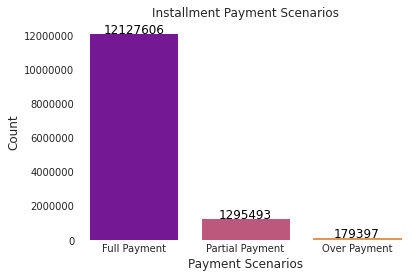

In [111]:
payment_counts = [inst_pay['FULL_PAYMENT'].sum(), inst_pay['PARTIAL_PAYMENT'].sum(), inst_pay['OVER_PAYMENT'].sum()]
payment_labels = ['Full Payment', 'Partial Payment', 'Over Payment']
columns = {
 'Payment Scenarios': payment_labels,
 'Count': payment_counts
}
df = pd.DataFrame(columns)

fig, ax = plt.subplots()
sns.barplot(x = 'Payment Scenarios', y = 'Count', data = df, ci=95, ax=ax, palette = 'plasma')
ax.set_title('Installment Payment Scenarios')
ax.tick_params(labelsize=10,length=0)
plt.box(False)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)

for index, row in df.iterrows():
    ax.text(row.name, row.Count, round(row.Count), color='black', ha='center')

### **Observation**:
- The majority of borrowers made full payments, indicating a strong repayment capacity, whereas a very small percentage of payments were overpaid or underpaid, reflecting that the borrowers were able to manage their repayments efficiently.

### Distribution of NUM_INSTALMENT_VERSION feature

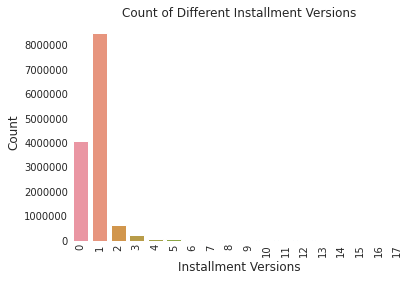

In [112]:
installment_versions = datasets["installments_payments"]["NUM_INSTALMENT_VERSION"].value_counts()
installment_versions = installment_versions[installment_versions > 1000]
columns = {
 'Installment Versions': installment_versions.index.astype('int64'),
 'Count': installment_versions.values
}
df = pd.DataFrame(columns)
fig, ax = plt.subplots()
sns.barplot(x = 'Installment Versions', y = 'Count', data = df)
ax.set_title('Count of Different Installment Versions')
plt.xticks(rotation=90)
ax.tick_params(labelsize=10,length=0)
plt.box(False)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.grid(linewidth=0.5,color='black')
ax.set_axisbelow(True)

### **Observation**:
- The installment version 1 has the highest count of more than 8 million, followed by version 0 with a count of around 4 million. This indicates that the majority of the installment payments have been made with version 0 and 1, while other installment versions have relatively low counts.

### Distribution of NUM_INSTALMENT_NUMBER feature

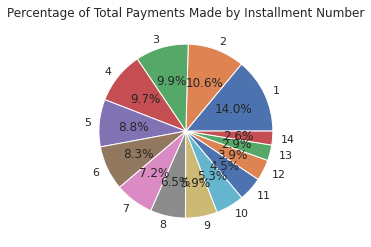

In [113]:
total_payments = datasets["installments_payments"]["AMT_PAYMENT"].sum()
payments_by_installment = datasets["installments_payments"].groupby("NUM_INSTALMENT_NUMBER")["AMT_PAYMENT"].sum()
percentages = payments_by_installment / total_payments * 100
percentages = percentages[percentages > 2.0]
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%')
plt.title("Percentage of Total Payments Made by Installment Number")
plt.show()

### **Observation**:
- The insight from the observation is that most borrowers were able to make their payments in a timely manner within the first few installments, which could indicate good financial management on their part.
- It could also suggest that the loan terms and repayment schedules were structured in a way that made it feasible for borrowers to make timely payments.

### Merging installments_payments and application_train based on SK_ID_CURR

In [114]:
merged_df = datasets['installments_payments'].merge(datasets['application_train'][['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
merged_df.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0.0


### Correlation of TARGET feature with installments_payments dataset

In [115]:
merged_df.corr()['TARGET'].abs().sort_values(ascending= False)

TARGET                    1.000000
DAYS_ENTRY_PAYMENT        0.035122
DAYS_INSTALMENT           0.034974
NUM_INSTALMENT_NUMBER     0.016190
NUM_INSTALMENT_VERSION    0.009896
AMT_PAYMENT               0.003623
SK_ID_CURR                0.002540
AMT_INSTALMENT            0.001498
SK_ID_PREV                0.000212
Name: TARGET, dtype: float64

### Heatmap of installments_payments dataset with TARGET feature

<AxesSubplot:>

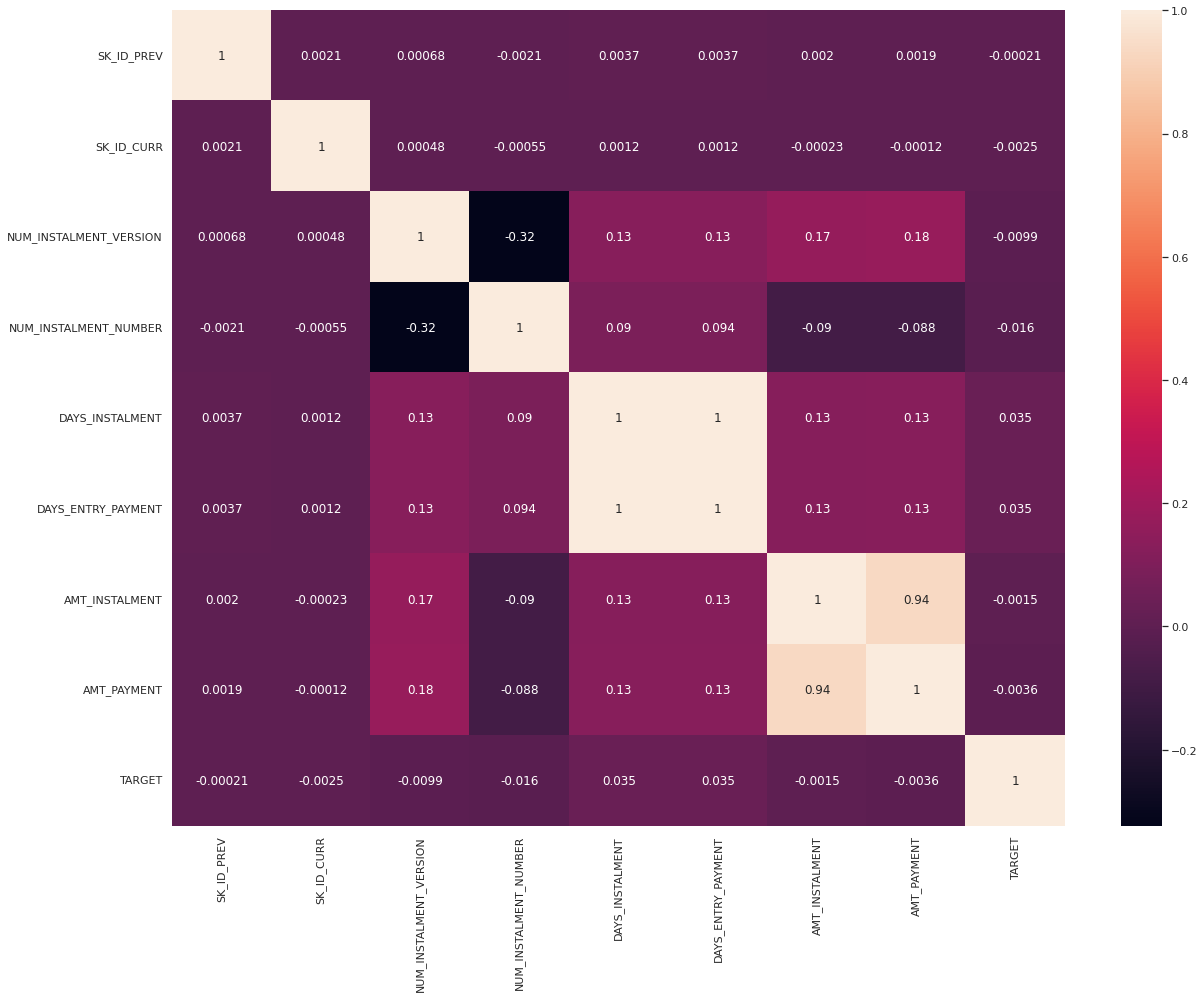

In [116]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(merged_df.corr(), annot=True)

### **Observation**:
- There is no strong correlation between the TARGET column and any of the other columns in the merged dataset of application_train and installments_payments files.
- The NUM_INSTALMENT_NUMBER and NUM_INSTALMENT_VERSION columns also have weak correlations with the TARGET column, which indicates that borrowers who have more installment payments or installment versions are slightly more likely to have difficulty repaying the loan.
- However, these correlations are relatively weak compared to the DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT columns. The rest of the columns have either no or very weak correlation with the TARGET column.

# Dataset questions
## Unique record for each SK_ID_CURR

In [117]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [118]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [119]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [120]:
# 
datasets["application_test"].shape

(48744, 118)

In [121]:
datasets["application_train"].shape

(307511, 119)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [122]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


1,670,214 rows, 37 columns


In [123]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [124]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [125]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


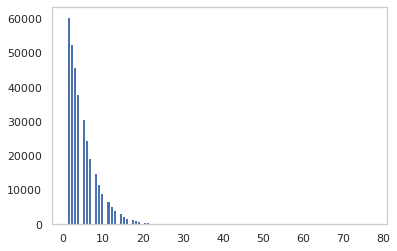

In [126]:
# How many previous applciations  per applicant in the previous_application 
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

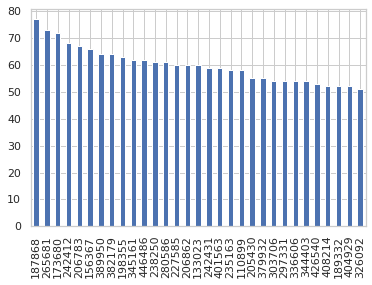

In [127]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Histogram of Number of previous applications for an ID

In [128]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

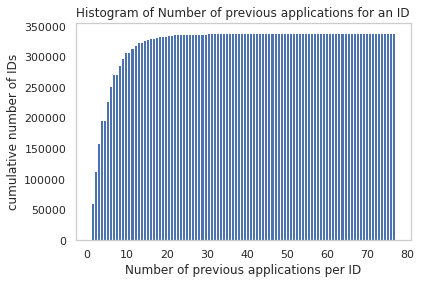

In [129]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [130]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


In [131]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [133]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## feature engineering for prevApp table

In [134]:
#appsDF['agg_op_features'].head()

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [135]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1.369693e+06,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,NaN,NaN,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,1.038818e+06,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,NaN,NaN,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,2.281150e+06,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,NaN,NaN,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,1.564014e+06,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,NaN,NaN,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,2.176837e+06,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,NaN,NaN,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


--------------------------------------------------


,SK_ID_CURR_,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean
0,100001,3951.000,3951.000,3951.000000,24835.5,24835.5,24835.500
1,100002,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.000
2,100003,6737.310,98356.995,56553.990000,68809.5,900000.0,435436.500
3,100004,5357.250,5357.250,5357.250000,24282.0,24282.0,24282.000
4,100005,4813.200,4813.200,4813.200000,0.0,44617.5,22308.750
...,...,...,...,...,...,...,...
338852,456251,6605.910,6605.910,6605.910000,40455.0,40455.0,40455.000
338853,456252,10074.465,10074.465,10074.465000,57595.5,57595.5,57595.500
338854,456253,3973.095,5567.715,4770.405000,19413.0,28912.5,24162.750
338855,456254,2296.440,19065.825,10681.132500,18846.0,223789.5,121317.750


result.shape: (338857, 8)


,SK_ID_CURR_,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,range_AMT_APPLICATION
0,100001,3951.000,3951.000,3951.000000,24835.5,24835.5,24835.500000,0.0
1,100002,9251.775,9251.775,9251.775000,179055.0,179055.0,179055.000000,0.0
2,100003,6737.310,98356.995,56553.990000,68809.5,900000.0,435436.500000,831190.5
3,100004,5357.250,5357.250,5357.250000,24282.0,24282.0,24282.000000,0.0
4,100005,4813.200,4813.200,4813.200000,0.0,44617.5,22308.750000,44617.5
5,100006,2482.920,39954.510,23651.175000,0.0,688500.0,272203.260000,688500.0
6,100007,1834.290,22678.785,12278.805000,17176.5,247500.0,150530.250000,230323.5
7,100008,8019.090,25309.575,15839.696250,0.0,450000.0,155701.800000,450000.0
8,100009,7435.845,17341.605,10051.412143,40455.0,110160.0,76741.714286,69705.0
9,100010,27463.410,27463.410,27463.410000,247212.0,247212.0,247212.000000,0.0


## feature transformer 

In [136]:

# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            #self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f]=["min", "max", "mean","median"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        #result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"


In [138]:
_#LOAD THE DATASET
X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app
burDF=datasets['bureau']
bureau_balDF=datasets['bureau_balance']
ccbDF=datasets['credit_card_balance']
ipDF=datasets['installments_payments']
posDF=datasets['POS_CASH_balance']

#SELECTED FEATURES ARE TAKEN FROM SECONDARY TABLES BASED ON CORRELATION ANALAYSIS
pr_features = ['AMT_CREDIT','CNT_PAYMENT']
br_features = ['DAYS_CREDIT', 'DAYS_CREDIT_UPDATE','DAYS_ENDDATE_FACT']
cc_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_DRAWINGS_ATM_CURRENT']
ip_features = ['DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT', 'AMT_PAYMENT']
pos_features = ['MONTHS_BALANCE','CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']

In [ ]:



#PREVIOUS APPLICATION TRANSFORMATION


prevApps_feature_pipeline = Pipeline([
        ('prevApps_aggregater', FeaturesAggregater(pr_features)), # Aggregate across old and new features
    ])
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(appsDF)


#Bureau Transformation


bureau_feature_pipeline = Pipeline([
        ('bureau_aggregater', FeaturesAggregater(br_features)), # Aggregate across old and new features
    ])
bureau_aggregated = bureau_feature_pipeline.fit_transform(burDF)

#Credit Card Balance Transformation


ccbal_feature_pipeline = Pipeline([
        ('ccbal_aggregater', FeaturesAggregater(cc_features)), # Aggregate across old and new features
    ])
ccbal_aggregated = ccbal_feature_pipeline.fit_transform(ccbDF)

#Installments Payments Transformation


inspay_feature_pipeline = Pipeline([
        ('inspay_aggregater', FeaturesAggregater(ip_features)), # Aggregate across old and new features
    ])
inspay_aggregated = inspay_feature_pipeline.fit_transform(ipDF)

#POS CASH Balance Transformation


poscashbal_feature_pipeline = Pipeline([
        ('poscashbal_aggregater', FeaturesAggregater(pos_features)), # Aggregate across old and new features
    ])
poscashbal_aggregated = poscashbal_feature_pipeline.fit_transform(posDF)


## Join the labeled dataset

In [ ]:
datasets.keys()

In [ ]:
# merge primary table and secondary tables using features based on meta data and  aggregage stats 
merged_data=False

if merged_data:
    # 1. Join/Merge in prevApps Data
    X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Bureau Data
    X_train = X_train.merge(bureau_aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in credit_card_balance  Data
    X_train = X_train.merge(ccbal_aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated installments_payments Data
    X_train = X_train.merge(inspay_aggregated, how='left', on="SK_ID_CURR")

    # 5. Join/Merge in Aggregated POS_CASH_balance Data
    X_train = X_train.merge(poscashbal_aggregated, how='left', on="SK_ID_CURR")



In [ ]:
X_train.shape

In [ ]:
x_train=X_train.copy()

## Join the unlabeled dataset (i.e., the submission file)

In [ ]:
if merged_data:
  X_kaggle_test= datasets["application_test"]
  X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
  X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on='SK_ID_CURR')
  X_kaggle_test = X_kaggle_test.merge(ccbal_aggregated, how='left', on='SK_ID_CURR')
  X_kaggle_test = X_kaggle_test.merge(inspay_aggregated, how='left', on='SK_ID_CURR')
  X_kaggle_test = X_kaggle_test.merge(poscashbal_aggregated, how='left', on='SK_ID_CURR')

   

In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [139]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = True #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features1 = [col for col in datasets["application_train"].columns if col != 'TARGET']
    elected_features2= selected_features1+br_features+pr_features+cc_features+ip_features+pos_features+['NAME_CONTRACT_TYPE']
    
    selected_features2 = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    
    X_train = datasets["application_train"][selected_features1]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features1]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

else: 
    y_train = X_train['TARGET']
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
            'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                      'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = X_train[selected_features]
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 118)
X validation      shape: (46127, 118)
X test            shape: (39208, 118)
X X_kaggle_test   shape: (48744, 118)


In [140]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222176 entries, 21614 to 212146
Columns: 118 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(62), int64(40), object(16)
memory usage: 201.7+ MB


In [142]:
# Identify the numeric features we wish to consider.

num_attribs1= X_train.select_dtypes(include=['int64', 'float64']).columns



num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs1)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.

cat_attribs1 = X_train.select_dtypes(include=['object']).columns

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs1)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [144]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Params",
                                   "Description"
                                  ])


In [145]:
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Params,Description


## Logistic Regression

In [146]:
%%time 
np.random.seed(42)
lr_baseline_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("model", LogisticRegression())
    ])
lr_base_model = lr_baseline_pipeline.fit(X_train, y_train)

CPU times: user 6min 45s, sys: 3min 3s, total: 9min 48s
Wall time: 11.4 s


In [147]:
lr_baseline_pipeline

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUM...
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))),
                                                                 ('imputer',
                                                                  SimpleImputer(fill_value='missing',
                                               

### Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [148]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, lr_base_model.predict(X_train)), 3)

0.92

In [149]:
y_pred_lr=lr_base_model.predict_proba(X_test)[:, 1]

In [150]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, lr_base_model.predict_proba(X_train)[:, 1])


0.7482647212089917

In [151]:
exp_name = f"Logistic_Baseline_{len(selected_features1)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, lr_base_model.predict(X_train)), 
                accuracy_score(y_valid, lr_base_model.predict(X_valid)),
                accuracy_score(y_test, lr_base_model.predict(X_test)),
                roc_auc_score(y_train, lr_base_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, lr_base_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, lr_base_model.predict_proba(X_test)[:, 1])],4))+\
                ["C: "+str(lr_baseline_pipeline.named_steps['model'].get_params()['C'])+ " "+ "penalty: "+str(lr_baseline_pipeline.named_steps['model'].get_params()['penalty'])]+\
                ["Only Application train features are used"]
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Params,Description
0,Logistic_Baseline_118_features,0.9198,0.9194,0.9159,0.7483,0.7438,0.7489,C: 1.0 penalty: l2,Only Application train features are used


## Decision Tree

In [152]:
%%time 
dt_baseline_pipeline = Pipeline([ ("preparation", data_prep_pipeline),
                                 ("dt_model", DecisionTreeClassifier(random_state=42))])
dt_base_model = dt_baseline_pipeline.fit(X_train, y_train)

CPU times: user 23.5 s, sys: 211 ms, total: 23.7 s
Wall time: 23.7 s


In [153]:
y_pred_dt=dt_base_model.predict_proba(X_test)[:, 1]

In [154]:
print("Accuary: " + str(np.round(accuracy_score(y_train, dt_base_model.predict(X_train)), 3)))

r=roc_auc_score(y_train, dt_base_model.predict_proba(X_train)[:, 1])
print("ROC SCORE: "+ str(r))

Accuary: 1.0
ROC SCORE: 1.0


In [155]:
exp_name = f"Decision_tree_Baseline_{len(selected_features1)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, dt_base_model.predict(X_train)), 
                accuracy_score(y_valid, dt_base_model.predict(X_valid)),
                accuracy_score(y_test, dt_base_model.predict(X_test)),
                roc_auc_score(y_train, dt_base_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, dt_base_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, dt_base_model.predict_proba(X_test)[:, 1])],4))+\
                ["min_samples_leaf: "+str(dt_baseline_pipeline.named_steps['dt_model'].get_params()['min_samples_leaf'])]+\
                ["Only Application train features are used"]
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Params,Description
0,Logistic_Baseline_118_features,0.9198,0.9194,0.9159,0.7483,0.7438,0.7489,C: 1.0 penalty: l2,Only Application train features are used
1,Decision_tree_Baseline_118_features,1.0000,0.8526,0.8501,1.0000,0.5377,0.5370,min_samples_leaf: 1,Only Application train features are used


## Random Forest

In [156]:
%%time
rf_baseline_pipeline = Pipeline([ ("preparation", data_prep_pipeline),
                                 ("rf_model", RandomForestClassifier())])
rf_base_model = rf_baseline_pipeline.fit(X_train, y_train)

CPU times: user 1min 17s, sys: 243 ms, total: 1min 18s
Wall time: 1min 18s


In [157]:
y_pred_rf=rf_base_model.predict_proba(X_test)[:, 1]

In [158]:
print("Accuary: " + str(np.round(accuracy_score(y_train, rf_base_model.predict(X_train)), 3)))

r=roc_auc_score(y_train, rf_base_model.predict_proba(X_train)[:, 1])
print("ROC SCORE: "+ str(r))

Accuary: 1.0
ROC SCORE: 1.0


In [159]:
exp_name = f"Random_Forest_Baseline_{len(selected_features1)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, rf_base_model.predict(X_train)), 
                accuracy_score(y_valid, rf_base_model.predict(X_valid)),
                accuracy_score(y_test, rf_base_model.predict(X_test)),
                roc_auc_score(y_train, rf_base_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, rf_base_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, rf_base_model.predict_proba(X_test)[:, 1])],4))+\
                ["n_estimators: "+str(rf_baseline_pipeline.named_steps['rf_model'].get_params()['n_estimators'])+\
                 " "+ "min_samples_leaf: "+str(rf_baseline_pipeline.named_steps['rf_model'].get_params()['min_samples_leaf'])]+\
                ["Only Application train features are used"]
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Params,Description
0,Logistic_Baseline_118_features,0.9198,0.9194,0.9159,0.7483,0.7438,0.7489,C: 1.0 penalty: l2,Only Application train features are used
1,Decision_tree_Baseline_118_features,1.0000,0.8526,0.8501,1.0000,0.5377,0.5370,min_samples_leaf: 1,Only Application train features are used
2,Random_Forest_Baseline_118_features,1.0000,0.9195,0.9159,1.0000,0.7126,0.7108,n_estimators: 100 min_samples_leaf: 1,Only Application train features are used


## Gaussian Naive Bayes

In [160]:
%%time
gb_baseline_pipeline = Pipeline([ ("preparation", data_prep_pipeline),
                                 ("gb_model", GaussianNB())])
gb_base_model = gb_baseline_pipeline.fit(X_train, y_train)

CPU times: user 2.39 s, sys: 280 ms, total: 2.67 s
Wall time: 2.67 s


In [161]:
y_pred_gb=gb_base_model.predict_proba(X_test)[:, 1]

In [162]:
print("Accuary: " + str(np.round(accuracy_score(y_train, gb_base_model.predict(X_train)), 3)))

r=roc_auc_score(y_train, gb_base_model.predict_proba(X_train)[:, 1])
print("ROC SCORE: "+ str(r))

Accuary: 0.154
ROC SCORE: 0.5410853517001715


In [163]:
exp_name = f"GaussianNB_Baseline_{len(selected_features1)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gb_base_model.predict(X_train)), 
                accuracy_score(y_valid, gb_base_model.predict(X_valid)),
                accuracy_score(y_test, gb_base_model.predict(X_test)),
                roc_auc_score(y_train, gb_base_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gb_base_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gb_base_model.predict_proba(X_test)[:, 1])],4))+\
                ["var_smoothing: "+str(gb_base_model.named_steps['gb_model'].get_params()['var_smoothing'])]+\
                ["Only Application train features are used"]
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Params,Description
0,Logistic_Baseline_118_features,0.9198,0.9194,0.9159,0.7483,0.7438,0.7489,C: 1.0 penalty: l2,Only Application train features are used
1,Decision_tree_Baseline_118_features,1.0000,0.8526,0.8501,1.0000,0.5377,0.5370,min_samples_leaf: 1,Only Application train features are used
2,Random_Forest_Baseline_118_features,1.0000,0.9195,0.9159,1.0000,0.7126,0.7108,n_estimators: 100 min_samples_leaf: 1,Only Application train features are used
3,GaussianNB_Baseline_118_features,0.1540,0.1543,0.1582,0.5411,0.5421,0.5428,var_smoothing: 1e-09,Only Application train features are used


# Comparing all the models visually

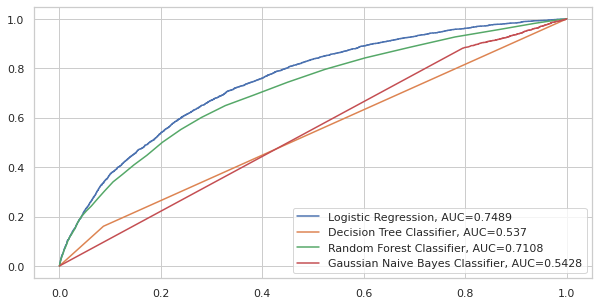

In [164]:
from sklearn import metrics
plt.figure(figsize=(10, 5))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dt)
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_gb)
auc = round(metrics.roc_auc_score(y_test, y_pred_gb), 4)
plt.plot(fpr,tpr,label="Gaussian Naive Bayes Classifier, AUC="+str(auc))

plt.legend()

<b>THE BEST AUC SCORE IS OF LOGISTIC REGRSSION, I.E 74.89%</b>

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [165]:
test_class_scores = lr_base_model.predict_proba(X_kaggle_test)[:, 1]

In [166]:
test_class_scores[0:10]

array([0.0588056 , 0.23416166, 0.05923027, 0.02826886, 0.11828474,
       0.03511422, 0.02133293, 0.10026626, 0.01555552, 0.1134028 ])

In [167]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.058806
1,100005,0.234162
2,100013,0.059230
3,100028,0.028269
4,100038,0.118285


In [168]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [169]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|██████████████████████████████████████| 1.26M/1.26M [00:00<00:00, 2.19MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

# <u> **Home Credit Default Risk (HCDR)** <u>
# <u> **Final Project for Spring 2023 course: CSCI-P 556 - Applied Machine Learning** <u>

# <u> **Write-up** <u>

## **Abstract**
Home Credit is looking to develop a Machine Learning Pipeline that could aid in making accurate lending decisions for clients who have insufficient or non-existent credit history and make their overall experience good. The provided dataset has a total of 7 tables which also includes telco and transactional information of various clients. In phase 2, our main aim was to do Exploratory Data Analysis and to create a Baseline Pipeline. In our EDA we are looking into multiple things such as data types, statistical information, missing values, and correlations with the target to get insights on which features need to be pre-processed and which features could end up playing an important role to build a good pipeline. We then tried out multiple ML Algorithms such as logistic regression, support vector classification, gaussian naive bayes, random forest classification, and decision tree classification and made a table with its results. We then used accuracy and ROC Curve as a rubric to see which algorithm is doing well in this phase. The result that we found was that Logistic Regression was giving us the best result and the Test AUC value for the same is approximately 74%. In the next phase, we plan on performing feature engineering and hyperparameter tuning to make the existing models better.

## **Project Description (data and tasks)**

**Data description:** <br>
1. **application_{train|test}.csv**
 - The primary table consists of the necessary information regarding home credit loan applications. This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample.

2. **bureau.csv**
 - This is a record of how well the client has paid back loans and borrowed money in the past, as reported by other banks or lenders. All client's previous credits provided by other financial institutions were reported to the Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as the number of credits the client had in the Credit Bureau before the application date.

3. **bureau_balance.csv**
 - This has information about the amounts you owed and paid back each month in the past, which is recorded by a company that keeps track of people's credit histories. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

4. **POS_CASH_balance.csv**
 - This table shows how much money the client owes to Home Credit every month from their previous purchases made using credit or cash loans. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

5. **credit_card_balance.csv**
 - This table shows how much money the applicant owed on their Home Credit credit cards in past months. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

6. **previous_application.csv**
 - All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.


7. **installments_payments.csv**
 - This shows whether or not you've paid back loans you got from Home Credit in the past. There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

![dataset](https://user-images.githubusercontent.com/77334892/230755289-f8a02cfc-5ec6-4e98-85fd-6c28698ed577.jpeg)

<br> **Task to be tackled:** <br>
To accomplish this project, the following steps will be taken:

1. Data Visualization and Exploratory Data Analysis: The graphical depiction of data and information is known as data visualization. In order to help illustrate patterns, trends, and correlations within the data, visualizations like charts, graphs, and maps are made. EDA on the other hand is the process of applying statistical and graphical tools to analyze and summarize a dataset's key features. EDA uses a number of approaches, including outlier detection, correlation analysis, and summary statistics. EDA would play a key role in ensuring our data's accuracy and quality and is a crucial stage in creating a machine learning model that works for our problem statement.

2. Data cleaning and preprocessing: The HCDR dataset contains several tables with missing values, outliers, and inconsistencies. These issues will be addressed through imputation, normalization, and feature scaling, to prepare the data for modeling.


3. Model selection: Several machine learning algorithms will be evaluated to determine the most appropriate model for the task, taking into account performance metrics such as accuracy, precision, recall, and AUC-ROC. Potential models may include logistic regression, decision trees, random forests, gradient boosting, or neural networks.


4. Evaluation and interpretation: The final model will be evaluated on a holdout set of data to assess its generalization performance and identify any potential biases or limitations. Interpretability techniques such as feature importance analysis and partial dependence plots may be used to gain insights into the underlying relationships between features and outcomes.

- The overall goal of the project is to develop a reliable and accurate model that can assist Home Credit in assessing the creditworthiness of its borrowers and reducing the risk of loan default.

<br> **Workflow Diagram:**
![Gantt_Chart_1](https://user-images.githubusercontent.com/77334892/230755256-6d391ebe-7b0b-4ef3-8804-22c46ed0d8b3.jpg)

![Gantt_Chart_1](https://user-images.githubusercontent.com/77334892/230755271-16abe513-ae73-47e9-b0d2-48a0f1747451.jpg)

![Gantt_Chart_3](https://user-images.githubusercontent.com/77334892/230755278-984e9aa5-5445-448a-9c55-5ee7f0a5c9e5.jpg)

## **Team and Plan updates**
**Team name:** FP_Group22 <br><br>

**Team members:**
1. Aarushi Dua (aarudua@iu.edu)
2. Sai Teja Burla (saburla@iu.edu)
3. Lakshay Madaan (lmadaan@iu.edu)
4. Shyam Makwana (smakwana@iu.edu) <br><br>

**Phase leadership plan:** <br><br>
<div align="left" dir="ltr" style="margin-left:0pt;">
    <table style="border:none;border-collapse:collapse;">
        <tbody>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.4297%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: center; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 17.9426%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: center; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase Leader</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; text-align: center; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Tasks</span></p>
                </td>
            </tr>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.4297%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 1</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 17.9426%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makwana</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Project proposal, Layout, Notebook, Credit assignment plan, Gantt chart, Dataset</span></p>
                </td>
            </tr>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.4297%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 2</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 17.9426%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Grab data, EDA, Metrics, Baseline models, Baseline pipeline, Brief report, Presentation and script</span></p>
                </td>
            </tr>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.4297%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 3</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 17.9426%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Feature engineering, Hyperparameter tuning, Additional feature selection, ensemble methods, Presentation and script</span></p>
                </td>
            </tr>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.4297%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 4</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 17.9426%;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; text-align: left; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size:12pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Neural Network, Advanced model architectures, Loss functions, Final project presentation and report</span></p>
                </td>
            </tr>
        </tbody>
    </table>
</div>
<br><br>

**Credit assignment plan:** <br><br>
<div align="left" dir="ltr" style="margin-left:0pt;">
    <table style="border:none;border-collapse:collapse;">
        <tbody>
            <tr style="height:0pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.1742%;">
                    <p dir="ltr" style="line-height: 1.2; margin-top: 0pt; margin-bottom: 0pt; text-align: center;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height: 1.2; margin-top: 0pt; margin-bottom: 0pt; text-align: center;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Member Name</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height: 1.2; margin-top: 0pt; margin-bottom: 0pt; text-align: center;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Task Name</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height: 1.2; margin-top: 0pt; margin-bottom: 0pt; text-align: center;"><span style="font-size:13pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:700;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Description</span></p>
                </td>
            </tr>
            <tr style="height:26.839843749999996pt;">
                <td rowspan="12" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.1742%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 1</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makwana</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Problem Understanding</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Comprehending the problem and understanding the provided data&nbsp;</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="3" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makwana</span></p><br><br>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Assigning Tasks</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Assigning tasks to each of the team members&nbsp;</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase Planning</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Planning all the phases</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Data Description</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Describing what information each of the given csv files have with a sample of their content&nbsp;</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="3" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Abstract</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Brief description of the problem statement at hand</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Researched ML models and metric</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Description of ML Models and Evaluation Metrics&nbsp;</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Block Diagram</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Visual representation of the pipeline</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="2" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Model Pipeline</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Explained the steps to perform during the course of the project</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Gantt Chart</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Summarize the timeline of the project using gantt charts</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Credit Assignment Plan</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Design the four phases and describe the task required.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="2" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Environmental Setup</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Connected Data with docker</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Data Preparation</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Checked Dataset are loading and performing basic data visualization.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="6" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.1742%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 2</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Data Visualization and EDA</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Visualize the dataset to gather insights and perform different data pre-processing techniques.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makwana</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Feature Engineering and Pipeline Creation</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Data Transformation is required and will add/remove necessary features.&nbsp;</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Along with creating a pipeline for numeric and categorical features.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Model Training</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Fit the training data on various ML algorithms using pipelines</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Model Evaluation</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Apply different evaluation metrics to get the accuracy and loss</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makwana</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Research about different Hyperparameters</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Gather hyperparameters of each model applied into the GridsearchCV</span></p>
                </td>
            </tr>
            <tr style="height:36.5478515625pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Comparing Baseline Models</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Compare the results of each baseline model.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="4" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.1742%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 3</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Feature Importance</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Figure out the importance of each features used</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Tuning Hyperparameters</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Hyperparameter tuning is performed again to improve the performance.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makhwana</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Visualizing different algorithm&rsquo;s results</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Plot bars and charts to display the results of each model</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Feature Engineering</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Any further manipulation in features if required</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td rowspan="3" style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 8.1742%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><br></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Phase 4</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Lakshay Madaan</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Final Model Evaluation</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Perform final model evaluation on the best model achieved.</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Shyam Makhwana</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Report Writing and Video Editing</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Write report for final submission and record the video presentation</span></p>
                </td>
            </tr>
            <tr style="height:21pt;">
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 14.8176%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Sai Teja Burla</span></p>
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Aarushi Dua</span></p>
                </td>
                <td style="border-width: 1pt; border-style: solid; border-color: rgb(0, 0, 0); vertical-align: top; padding: 5pt; overflow: hidden; overflow-wrap: break-word; width: 24.0845%;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Adding Multilayer Perceptron</span></p>
                </td>
                <td style="border-left:solid #000000 1pt;border-right:solid #000000 1pt;border-bottom:solid #000000 1pt;border-top:solid #000000 1pt;vertical-align:top;padding:5pt 5pt 5pt 5pt;overflow:hidden;overflow-wrap:break-word;">
                    <p dir="ltr" style="line-height:1.2;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:11pt;font-family:Calibri,sans-serif;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Introduce advance ML model; i.e Pytorch model for further improvement in model&rsquo;s accuracy</span></p>
                </td>
            </tr>
        </tbody>
    </table>
</div>

## **Introduction**

## **Feature Engineering and transformers**
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material

## **Modeling Pipelines**
**A visualization of the modeling pipelines and subpipelines:**
![Block Diagram](https://user-images.githubusercontent.com/77334892/230744645-8ae7d731-74ed-4fea-bbc4-1c5dd1ade8e8.jpg)<br>

<br>**Machine Learning Pipelines:**<br>
The model that we are aiming to build should have the capability to classify the target variable into two classes, i.e. 1 or 0 which are the numeric representation for whether the person who took out a loan will repay it or not based on all the data provided to us in the dataset. For achieving this with accurate results we are planning on trying the following algorithms to see which one provides us with the best outcome:

1. **Logistic Regression** - This is a form of statistical model that is used to examine the correlation between a binary or categorical dependent variable and one or more independent variables. It employs a logistic function to simulate the likelihood that the dependent variable will fall into a certain category. The logistic function converts any input to a number between 0 and 1, which represents the likelihood of the binary result.

$$
\text { Log Loss } = -\frac{1}{N}\sum_{i=1}^n y_i * log(p(y_i))+ (1-y_i) * log(1-p(y_i)) + \frac{\lambda}{2}||{\theta}||^2
$$

2. **Gaussian Naive Bayes** - It is a variant of the Naive Bayes algorithm for classification tasks in machine learning. It is predicated on the Bayes theorem and the supposition of data feature independence. The input characteristics in Gaussian Naive Bayes are thought to have a Gaussian or normal distribution. With the input data, the algorithm determines the likelihood of each class, and then it chooses the class with the highest probability as the anticipated output.

3. **Support Vector Classification** - This model is predicated on the notion of locating a hyperplane that separates the data points of several classes with the greatest possible margin. The support vectors, or data points that are most near the hyperplane are found, and then the model tries to maximize that distance. The output of the model is governed by the sign of the separation between the input data and the hyperplane, and the hyperplane is specified by a set of coefficients that are learnt during training.

$$ L(w,b) = \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_i(w^Tx_i + b)) + \frac{\lambda}{2}||w||^2 $$

4. **Decision Tree Classification** - In this model, based on the characteristics of the input data, a tree-like model of decisions and their potential outcomes is built. The method begins with the complete dataset and chooses the optimal feature to divide the data according to a certain criterion, such Gini Impurity or Information Gain.  The data is then divided into subsets depending on the selected feature and the procedure is then performed iteratively for each subset until all the data in each subset belong to the same class, or a stopping requirement is satisfied.

5. **Random Forest Classification** - This model builds numerous decision trees using subsets of the input data and randomly choosing features for each split. Each decision tree only sees a subset of the data since they are trained on a bootstrapped sample of the data. The decision trees' majority vote determines the algorithm's final result.

6. **Neural Networks** - Neural networks are a class of models that learn by adjusting the weights of the input features to generate a desired output. The input features are fed into a network of interconnected neurons, which transform the input through a series of mathematical operations. These transformations are governed by a set of weights that are learned during training. The output is then compared to the actual target output and the weights are updated using a loss function, such as cross-entropy loss.

$$ BinaryCrossEntropy = H_p(q) = -\frac{1}{N}\sum_{i=1}^n y_i * log(p(y_i))+ (1-y_i) * log(1-p(y_i)) + \frac{\lambda}{2}||{\theta}||^2 $$

<br>**Description of metrics and analysis:**<br>
The evaluation metrics that we want to use to check whether our model is performing well or not are as follows:

1. **Confusion Matrix** - A confusion matrix is a table that is frequently used to assess the effectiveness of a classification model. It is a matrix that compares the predicted labels of the model with the actual labels of the data. 

 - The confusion matrix consists of the following cells:
<table style="border-collapse:collapse;border:none;">
    <tbody>
        <tr>
            <td style="width: 99pt;border: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">True Positive (TP)</span></p>
            </td>
            <td style="width: 351.8pt;border-top: 1pt solid windowtext;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-image: initial;border-left: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">The number of rows that are correctly predicted as positive by the model.</span></p>
            </td>
        </tr>
        <tr>
            <td style="width: 99pt;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-left: 1pt solid windowtext;border-image: initial;border-top: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">True Negative (TN)&nbsp;</span></p>
            </td>
            <td style="width: 351.8pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">The&nbsp;number&nbsp;of&nbsp;rows&nbsp;that&nbsp;are&nbsp;correctly&nbsp;predicted&nbsp;as&nbsp;negative&nbsp;by&nbsp;the&nbsp;model.</span></p>
            </td>
        </tr>
        <tr>
            <td style="width: 99pt;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-left: 1pt solid windowtext;border-image: initial;border-top: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">False&nbsp;Positive (FP)</span></p>
            </td>
            <td style="width: 351.8pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">The&nbsp;number&nbsp;of&nbsp;rows&nbsp;that&nbsp;are&nbsp;incorrectly&nbsp;predicted&nbsp;as&nbsp;positive&nbsp;by&nbsp;the&nbsp;model.</span></p>
            </td>
        </tr>
        <tr>
            <td style="width: 99pt;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-left: 1pt solid windowtext;border-image: initial;border-top: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">False Negative (FN)</span></p>
            </td>
            <td style="width: 351.8pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;'><span style="font-size:14px;color:black;">The number of rows that are incorrectly predicted as negative by the model.</span></p>
            </td>
        </tr>
    </tbody>
</table>


2. **Classification Report** - An evaluation of a classification model's performance is summarized in a classification report, which is commonly produced using metrics derived from a confusion matrix. A classification report generally includes the following metrics:<br>
    - **Precision** - The ratio of true positives among all the instances that the model classified as positive. <br><br>
$$ Precision = \frac{TP}{TP + FP} $$<br>
    - **Recall** - The ratio of true positives among all the instances that actually belong to the positive class of the model.<br><br>
$$ Recall = \frac{TP}{TP + FN} $$ <br>
    - **F1-Score** - The harmonic mean of precision and recall.<br><br>
$$ F1 = \frac{2 * Precision * Recall}{Precision + Recall} = \frac{2*TP}{2*TP+FP+FN} $$ <br>

3. **Accuracy Score** - A typical performance metric in machine learning for assessing the accuracy of a classification model is the accuracy score. It is defined as the ratio of correctly classified instances out of the total number of instances in the dataset.<br><br>
$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$ <br>

4. **ROC Curve** - An ROC curve is a graphical representation of the performance of a binary classification model at different classification thresholds. In machine learning, it is frequently used to assess and contrast the effectiveness of various categorization models. The True Positive Rate and False Positive Rate are plotted on the y-axis and x-axis respectively.

-- Families of input features and count per family
-- Number of input features
-- Number of experiments conducted
-- Experiment table with the following details per experiment:
----- Baseline experiment
---- The families of input features used
----- For train/valid/test record the following in a Pandas DataFrame:
---- Accuracy
---- AUC/ROC

## **Experimental results**




<img width="868" alt="Screenshot 2023-04-11 at 8 42 07 PM" src="https://media.github.iu.edu/user/21656/files/ba921020-00b1-4109-b033-0f8f2aa95833">


For next phase, tried a little experiment- <br>
<img width="875" alt="Screenshot 2023-04-11 at 9 45 03 PM" src="https://media.github.iu.edu/user/21656/files/aacafb9e-9bb9-44af-8382-9c4eaf5d013a">

## **Discussion**
We infer the following for each algorithm we have tried as a part of Phase 2:
- Logistic Regression - This works the best for this dataset as this didnt overfit the training data and is also providing a decent Test AUC score which is around 74%.
- Gaussian Naive Bayes - This algorithm is not well fit for this dataset as we need to use continuous and normalized data for this algorithm to work well which is not the case here.
- Decision Tree and Random Forest - Both these models overfit because we could see in the table that both their Train Accuracies are 100%. 

<img width="875" alt="Screenshot 2023-04-11 at 9 45 03 PM" src="https://media.github.iu.edu/user/21656/files/aacafb9e-9bb9-44af-8382-9c4eaf5d013a">

We also experimented by adding few features from previous application to application_train, but as we can observe that by adding 2 important feature from just one secondary table has impacted the result of logistic regression and the result of decision tree also jumped but it seemed ambiguous as it is still overfitting so we didn;t use it for our Kaggle submission. But in futher phase we will try to do more cleaning and feature engineering inorder to get best model. 



## **Conclusion**

- EDA was used to understand and identify significant features which were then used to implement the modelling pipelines
- We created the ML pipelines by experimenting with various classifiers
- We observed that there might be underfitting in Gaussian Naive Bayes and  overfitting in Decision Tree and Random Forest implementations. 
- In the next phase, we intend to implement advance feature engineering techniques and perform hyperparameter tuning for our existing models.
- We aim to gain a more comprehensive understanding of the data, which will help us to determine the most suitable model and further enhance the evaluation metrics.



## **Kaggle Submission**
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

<img width="942" alt="Screenshot 2023-04-11 at 9 01 15 PM" src="https://media.github.iu.edu/user/21656/files/43913efc-41be-4f4f-91aa-36fc9228e030">


<img width="843" alt="Screenshot 2023-04-11 at 8 47 35 PM" src="https://media.github.iu.edu/user/21656/files/f2b611e4-f836-43fe-97f8-1859c6d71c49">

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


1. https://www.kaggle.com/c/home-credit-default-risk
2. https://matplotlib.org/

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/